In [1]:
!pip install pandas==1.5.2
!pip install scikit-learn
!pip install tqdm
!pip install catboost

In [2]:
import pandas as pd
traveller = pd.read_csv("tn_traveller_master_여행객 Master_제주_final.csv")
visit_area = pd.read_csv("tn_visit_area_info_방문지정보_제주_final.csv")
travel = pd.read_csv("tn_travel_여행_제주_final.csv")

In [3]:
visit_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32702 entries, 0 to 32701
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   VISIT_AREA_ID        32702 non-null  int64  
 1   TRAVEL_ID            32702 non-null  object 
 2   VISIT_ORDER          32702 non-null  int64  
 3   VISIT_AREA_NM        32702 non-null  object 
 4   VISIT_START_YMD      32702 non-null  object 
 5   VISIT_END_YMD        32702 non-null  object 
 6   ROAD_NM_ADDR         32702 non-null  object 
 7   LOTNO_ADDR           32702 non-null  object 
 8   X_COORD              32697 non-null  float64
 9   Y_COORD              32697 non-null  float64
 10  ROAD_NM_CD           38 non-null     float64
 11  LOTNO_CD             632 non-null    object 
 12  POI_ID               13451 non-null  object 
 13  POI_NM               13451 non-null  object 
 14  RESIDENCE_TIME_MIN   32635 non-null  float64
 15  VISIT_AREA_TYPE_CD   32702 non-null 

In [4]:
traveller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TRAVELER_ID                2493 non-null   object 
 1   RESIDENCE_SGG_CD           2493 non-null   int64  
 2   GENDER                     2493 non-null   object 
 3   AGE_GRP                    2493 non-null   int64  
 4   EDU_NM                     2493 non-null   int64  
 5   EDU_FNSH_SE                2493 non-null   float64
 6   MARR_STTS                  2493 non-null   float64
 7   FAMILY_MEMB                2493 non-null   int64  
 8   JOB_NM                     2415 non-null   float64
 9   JOB_ETC                    78 non-null     float64
 10  INCOME                     2493 non-null   int64  
 11  HOUSE_INCOME               1767 non-null   float64
 12  TRAVEL_TERM                2493 non-null   int64  
 13  TRAVEL_NUM                 2493 non-null   int64

In [5]:
visit_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32702 entries, 0 to 32701
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   VISIT_AREA_ID        32702 non-null  int64  
 1   TRAVEL_ID            32702 non-null  object 
 2   VISIT_ORDER          32702 non-null  int64  
 3   VISIT_AREA_NM        32702 non-null  object 
 4   VISIT_START_YMD      32702 non-null  object 
 5   VISIT_END_YMD        32702 non-null  object 
 6   ROAD_NM_ADDR         32702 non-null  object 
 7   LOTNO_ADDR           32702 non-null  object 
 8   X_COORD              32697 non-null  float64
 9   Y_COORD              32697 non-null  float64
 10  ROAD_NM_CD           38 non-null     float64
 11  LOTNO_CD             632 non-null    object 
 12  POI_ID               13451 non-null  object 
 13  POI_NM               13451 non-null  object 
 14  RESIDENCE_TIME_MIN   32635 non-null  float64
 15  VISIT_AREA_TYPE_CD   32702 non-null 

## visit_area(방문객정보)전처리

### x좌표 y좌표 결측치확인 및 처리

In [6]:
visit_area[visit_area['X_COORD'].isna()]

VISIT_AREA_ID  TRAVEL_ID  VISIT_ORDER VISIT_AREA_NM VISIT_START_YMD  \
1647      2210080001  d_d003290            1        친구/친지집      2022-10-08   
4001      2208060005  d_d000033           13            숙소      2022-08-06   
20665     2210080001  d_d003681            1        친구/친지집      2022-10-08   
21104     2210130001  d_d003636            1        친구/친지집      2022-10-13   
23718     2208220004  d_d000175            4       에스제이렌트카      2022-08-22   

      VISIT_END_YMD                  ROAD_NM_ADDR               LOTNO_ADDR  \
1647     2022-10-08           제주특별자치도 서귀포시 대청로 37   제주특별자치도 서귀포시 강정동 208-5   
4001     2022-08-07    제주 제주시 애월읍 애월해안로 566 라온빌리지          제주특별자치도 제주시 애월읍   
20665    2022-10-08         제주특별자치도 제주시 도령로 127-2    제주특별자치도 제주시 연동 2333-7   
21104    2022-10-13        제주특별자치도 서귀포시 일주동로 8610  제주특별자치도 서귀포시 동홍동 465-11   
23718    2022-08-22  제주 제주시 오일장중길 100 A동  에스제이렌트카         제주특별자치도 제주시 도두일동   

       X_COORD  Y_COORD  ...  RESIDENCE_TIME_MIN VISIT_AREA_TYPE_CD  \
1647       NaN      NaN  ...                 NaN                 22   
4001       NaN      NaN  ...               390.0                 24   
20665      NaN      NaN  ...                 NaN                 22   
21104      NaN      NaN  ...                 NaN                 22   
23718      NaN      NaN  ...                30.0                 10   

      REVISIT_YN VISIT_CHC_REASON_CD  LODGING_TYPE_CD  DGSTFN  \
1647         NaN                 NaN              NaN     NaN   
4001           Y                 2.0             11.0     5.0   
20665        NaN                 NaN              NaN     NaN   
21104        NaN                 NaN              NaN     NaN   
23718          N                11.0              NaN     5.0   

      REVISIT_INTENTION  RCMDTN_INTENTION   SGG_CD   SI  
1647                NaN               NaN  50110.0  서귀포  
4001                5.0               5.0  50110.0   제주  
20665               NaN               NaN      NaN   제주  
21104               NaN               NaN      NaN  서귀포  
23718               5.0               5.0  50110.0   제주  

[5 rows x 24 columns]

결측치 5개이므로 직접 채워넣음

In [7]:
visit_area.loc[1647, 'X_COORD'] = 126.5038
visit_area.loc[1647, 'Y_COORD'] = 33.2527

In [8]:
visit_area.loc[4001, 'X_COORD'] = 126.3642
visit_area.loc[4001, 'Y_COORD'] = 33.4777

In [9]:
visit_area.loc[20665, 'X_COORD'] = 126.4907
visit_area.loc[20665, 'Y_COORD'] = 33.4931

In [10]:
visit_area.loc[21104, 'X_COORD'] = 126.5685
visit_area.loc[21104, 'Y_COORD'] = 33.2549

In [11]:
visit_area.loc[23718, 'X_COORD'] = 126.4770
visit_area.loc[23718, 'Y_COORD'] = 33.4984

In [12]:
visit_area[visit_area['Y_COORD'].isna()]

Empty DataFrame
Columns: [VISIT_AREA_ID, TRAVEL_ID, VISIT_ORDER, VISIT_AREA_NM, VISIT_START_YMD, VISIT_END_YMD, ROAD_NM_ADDR, LOTNO_ADDR, X_COORD, Y_COORD, ROAD_NM_CD, LOTNO_CD, POI_ID, POI_NM, RESIDENCE_TIME_MIN, VISIT_AREA_TYPE_CD, REVISIT_YN, VISIT_CHC_REASON_CD, LODGING_TYPE_CD, DGSTFN, REVISIT_INTENTION, RCMDTN_INTENTION, SGG_CD, SI]
Index: []

[0 rows x 24 columns]

### 세부주소 'Dong_Eup'만들기

In [13]:
import pandas as pd

visit_area['Dong_Eup'] = ''
visit_area['Dong_Eup'] = visit_area['LOTNO_ADDR'].str.split().str[2]

print(visit_area[['LOTNO_ADDR', 'Dong_Eup']])

                        LOTNO_ADDR Dong_Eup
0            제주특별자치도 제주시 노형동 904-4      노형동
1            제주특별자치도 제주시 용담2동 2002     용담2동
2            제주특별자치도 제주시 용담2동 2002     용담2동
3            제주특별자치도 제주시 용담2동 2002     용담2동
4            제주특별자치도 제주시 용담2동 2002     용담2동
...                            ...      ...
32697     제주특별자치도 제주시 이도이동 1768-16     이도이동
32698     제주특별자치도 제주시 한림읍 협재리 1398      한림읍
32699        제주특별자치도 제주시 용담이동 2002     용담이동
32700  제주특별자치도 서귀포시 남원읍 남원리 2384-1      남원읍
32701   제주특별자치도 서귀포시 성산읍 삼달리 437-5      성산읍

[32702 rows x 2 columns]


In [14]:
visit_area[visit_area['Dong_Eup'].isna()]

Empty DataFrame
Columns: [VISIT_AREA_ID, TRAVEL_ID, VISIT_ORDER, VISIT_AREA_NM, VISIT_START_YMD, VISIT_END_YMD, ROAD_NM_ADDR, LOTNO_ADDR, X_COORD, Y_COORD, ROAD_NM_CD, LOTNO_CD, POI_ID, POI_NM, RESIDENCE_TIME_MIN, VISIT_AREA_TYPE_CD, REVISIT_YN, VISIT_CHC_REASON_CD, LODGING_TYPE_CD, DGSTFN, REVISIT_INTENTION, RCMDTN_INTENTION, SGG_CD, SI, Dong_Eup]
Index: []

[0 rows x 25 columns]

In [15]:
visit_area['Dong_Eup'].unique()

array(['노형동', '용담2동', '영평동', '삼도2동', '일도이동', '이도이동', '용담이동', '한림읍', '월평동',
       '구좌읍', '건입동', '애월읍', '도두일동', '서호동', '중문동', '조천읍', '상효동', '아라일동',
       '남원읍', '연동', '상예동', '안덕면', '서귀동', '성산읍', '오라이동', '이도일동', '대정읍',
       '색달동', '보목동', '해안동', '한경면', '용담삼동', '삼도일동', '우도면', '이호일동', '삼도이동',
       '표선면', '토평동', '동홍동', '서홍동', '이호이동', '도두이동', '호근동', '외도일동', '하예동',
       '일도2동', '회수동', '일도1동', '삼양일동', '내도동', '법환동', '일도일동', '대포동', '강정동',
       '이도2동', '하효동', '신효동', '아라이동', '회천동', '하원동', '용담일동', '이도1동', '도남동',
       '화북이동', '화북일동', '오라일동', '봉개동', '오라삼동', '삼도1동', '용담1동', '용강동',
       '오등동', '영남동', '외도이동', '도련일동', '삼양이동', '중앙동', '삼양동', '천지동', '도련이동',
       '정방동', '도순동', '도평동', '삼양삼동', '예래동', '도두동'], dtype=object)

In [16]:
visit_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32702 entries, 0 to 32701
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   VISIT_AREA_ID        32702 non-null  int64  
 1   TRAVEL_ID            32702 non-null  object 
 2   VISIT_ORDER          32702 non-null  int64  
 3   VISIT_AREA_NM        32702 non-null  object 
 4   VISIT_START_YMD      32702 non-null  object 
 5   VISIT_END_YMD        32702 non-null  object 
 6   ROAD_NM_ADDR         32702 non-null  object 
 7   LOTNO_ADDR           32702 non-null  object 
 8   X_COORD              32702 non-null  float64
 9   Y_COORD              32702 non-null  float64
 10  ROAD_NM_CD           38 non-null     float64
 11  LOTNO_CD             632 non-null    object 
 12  POI_ID               13451 non-null  object 
 13  POI_NM               13451 non-null  object 
 14  RESIDENCE_TIME_MIN   32635 non-null  float64
 15  VISIT_AREA_TYPE_CD   32702 non-null 

### 방문지유형코드 1~8만 남기기

In [17]:
filtered_rows = visit_area[visit_area['VISIT_AREA_TYPE_CD'] < 9]
unique_values = filtered_rows['VISIT_AREA_NM'].unique()
print(len(unique_values))


1051


In [18]:
filtered_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7125 entries, 33 to 32701
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   VISIT_AREA_ID        7125 non-null   int64  
 1   TRAVEL_ID            7125 non-null   object 
 2   VISIT_ORDER          7125 non-null   int64  
 3   VISIT_AREA_NM        7125 non-null   object 
 4   VISIT_START_YMD      7125 non-null   object 
 5   VISIT_END_YMD        7125 non-null   object 
 6   ROAD_NM_ADDR         7125 non-null   object 
 7   LOTNO_ADDR           7125 non-null   object 
 8   X_COORD              7125 non-null   float64
 9   Y_COORD              7125 non-null   float64
 10  ROAD_NM_CD           0 non-null      float64
 11  LOTNO_CD             144 non-null    object 
 12  POI_ID               4490 non-null   object 
 13  POI_NM               4490 non-null   object 
 14  RESIDENCE_TIME_MIN   7125 non-null   float64
 15  VISIT_AREA_TYPE_CD   7125 non-null  

### 만족도, 재방문의향, 추천의향 결측치확인 및 처리

In [19]:
len(filtered_rows[filtered_rows['DGSTFN'].isna() & filtered_rows['REVISIT_INTENTION'].isna() & filtered_rows['RCMDTN_INTENTION'].isna()])

2

In [20]:
filtered_rows = filtered_rows.dropna(subset = ['DGSTFN'])
filtered_rows.reset_index(drop=True, inplace=True)

In [21]:
filtered_rows[filtered_rows['DGSTFN'].isna() & filtered_rows['REVISIT_INTENTION'].isna() & filtered_rows['RCMDTN_INTENTION'].isna()]

Empty DataFrame
Columns: [VISIT_AREA_ID, TRAVEL_ID, VISIT_ORDER, VISIT_AREA_NM, VISIT_START_YMD, VISIT_END_YMD, ROAD_NM_ADDR, LOTNO_ADDR, X_COORD, Y_COORD, ROAD_NM_CD, LOTNO_CD, POI_ID, POI_NM, RESIDENCE_TIME_MIN, VISIT_AREA_TYPE_CD, REVISIT_YN, VISIT_CHC_REASON_CD, LODGING_TYPE_CD, DGSTFN, REVISIT_INTENTION, RCMDTN_INTENTION, SGG_CD, SI, Dong_Eup]
Index: []

[0 rows x 25 columns]

## travel(여행정보)전처리

### 'TRAVEL_MISSION_CHECK'값을 'TRAVEL_MISSION_PRIORITY'로 변환

In [22]:
travel_list = []
for i in range(len(travel)):
    value = int(travel['TRAVEL_MISSION_CHECK'][i].split(';')[0])
    travel_list.append(value)
travel['TRAVEL_MISSION_PRIORITY'] = travel_list

## travel, traveller, visit_area을 df로 병합

In [23]:
travel_puri = travel[['TRAVEL_ID', 'TRAVELER_ID', 'TRAVEL_MISSION_PRIORITY']]
traveller_puri = traveller[['TRAVELER_ID', 'GENDER', 'AGE_GRP', 'INCOME', 'TRAVEL_STYL_1', 
                                     'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4', 'TRAVEL_STYL_5', 
                                     'TRAVEL_STYL_6', 'TRAVEL_STYL_7','TRAVEL_STYL_8', 
                                      'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM' ]]
visit_area_puri = filtered_rows[['TRAVEL_ID', 'VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD', 'DGSTFN',
                                  'REVISIT_INTENTION', 'RCMDTN_INTENTION', 'RESIDENCE_TIME_MIN', 'REVISIT_YN']]

In [24]:
df = pd.merge(travel_puri, traveller_puri, left_on = 'TRAVELER_ID', right_on = 'TRAVELER_ID', how = 'inner')

In [25]:
df = pd.merge(visit_area_puri, df, left_on = 'TRAVEL_ID', right_on = 'TRAVEL_ID', how = 'left')

In [26]:
len(df['TRAVEL_ID'].unique())

2203

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7123 entries, 0 to 7122
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRAVEL_ID                7123 non-null   object 
 1   VISIT_AREA_NM            7123 non-null   object 
 2   SI                       7123 non-null   object 
 3   Dong_Eup                 7123 non-null   object 
 4   VISIT_AREA_TYPE_CD       7123 non-null   int64  
 5   DGSTFN                   7123 non-null   float64
 6   REVISIT_INTENTION        7123 non-null   float64
 7   RCMDTN_INTENTION         7123 non-null   float64
 8   RESIDENCE_TIME_MIN       7123 non-null   float64
 9   REVISIT_YN               7123 non-null   object 
 10  TRAVELER_ID              7123 non-null   object 
 11  TRAVEL_MISSION_PRIORITY  7123 non-null   int64  
 12  GENDER                   7123 non-null   object 
 13  AGE_GRP                  7123 non-null   int64  
 14  INCOME                  

In [28]:
df['REVISIT_YN'] = df['REVISIT_YN'].replace("N",0)
df['REVISIT_YN'] = df['REVISIT_YN'].replace("Y",1)

In [29]:
df['REVISIT_YN'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7123 entries, 0 to 7122
Series name: REVISIT_YN
Non-Null Count  Dtype
--------------  -----
7123 non-null   int64
dtypes: int64(1)
memory usage: 111.3 KB


## 방문장소에 대한 만족,추천을 새로운 수치(new_variable)로 만듦

In [30]:
merged_df = df

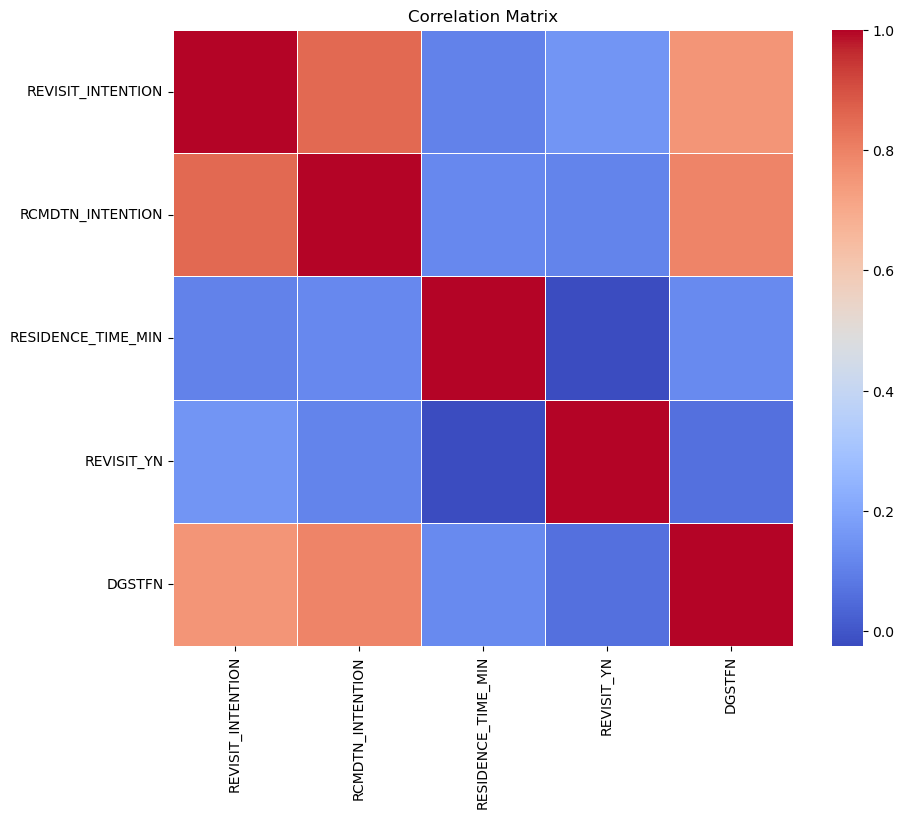

                    REVISIT_INTENTION  RCMDTN_INTENTION  RESIDENCE_TIME_MIN  \
REVISIT_INTENTION            1.000000          0.855723            0.104635   
RCMDTN_INTENTION             0.855723          1.000000            0.120176   
RESIDENCE_TIME_MIN           0.104635          0.120176            1.000000   
REVISIT_YN                   0.152931          0.109542           -0.024454   
DGSTFN                       0.754309          0.795184            0.124800   

                    REVISIT_YN    DGSTFN  
REVISIT_INTENTION     0.152931  0.754309  
RCMDTN_INTENTION      0.109542  0.795184  
RESIDENCE_TIME_MIN   -0.024454  0.124800  
REVISIT_YN            1.000000  0.063251  
DGSTFN                0.063251  1.000000  


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = merged_df[['REVISIT_INTENTION', 'RCMDTN_INTENTION', 'RESIDENCE_TIME_MIN', 'REVISIT_YN', 'DGSTFN']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
print(correlation_matrix)

### DGSTFN, RCMDTN_INTENTION, REVISIT_INTENTION이 상관관계가 높음

In [32]:
Id_lst = merged_df['TRAVEL_ID'].unique()

In [33]:
merged_df1 = merged_df
import pandas as pd

merged_df1['DGSTFN'] = pd.to_numeric(merged_df1['DGSTFN'], errors='coerce')

for id in Id_lst:
    group_id = merged_df1[merged_df1['TRAVEL_ID'] == id]
    group_id_mean = group_id['DGSTFN'].mean()
    revisit_mean = group_id['REVISIT_INTENTION'].mean()
    rcmdtn_mean = group_id['RCMDTN_INTENTION'].mean()
    
    merged_df1.loc[merged_df1['TRAVEL_ID'] == id, 'DGSTFN_div_mean'] = merged_df1.loc[merged_df1['TRAVEL_ID'] == id, 'DGSTFN'] / group_id_mean
    merged_df1.loc[merged_df1['TRAVEL_ID'] == id, 'REVISIT_INTENTION_div_mean'] = merged_df1.loc[merged_df1['TRAVEL_ID'] == id, 'REVISIT_INTENTION'] / revisit_mean
    merged_df1.loc[merged_df1['TRAVEL_ID'] == id, 'RCMDTN_INTENTION_div_mean'] = merged_df1.loc[merged_df1['TRAVEL_ID'] == id, 'RCMDTN_INTENTION'] / rcmdtn_mean

In [34]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7123 entries, 0 to 7122
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TRAVEL_ID                   7123 non-null   object 
 1   VISIT_AREA_NM               7123 non-null   object 
 2   SI                          7123 non-null   object 
 3   Dong_Eup                    7123 non-null   object 
 4   VISIT_AREA_TYPE_CD          7123 non-null   int64  
 5   DGSTFN                      7123 non-null   float64
 6   REVISIT_INTENTION           7123 non-null   float64
 7   RCMDTN_INTENTION            7123 non-null   float64
 8   RESIDENCE_TIME_MIN          7123 non-null   float64
 9   REVISIT_YN                  7123 non-null   int64  
 10  TRAVELER_ID                 7123 non-null   object 
 11  TRAVEL_MISSION_PRIORITY     7123 non-null   int64  
 12  GENDER                      7123 non-null   object 
 13  AGE_GRP                     7123 

### 'DGSTFN_div_mean','REVISIT_INTENTION_div_mean','RCMDTN_INTENTION_div_mean'값 분포확인

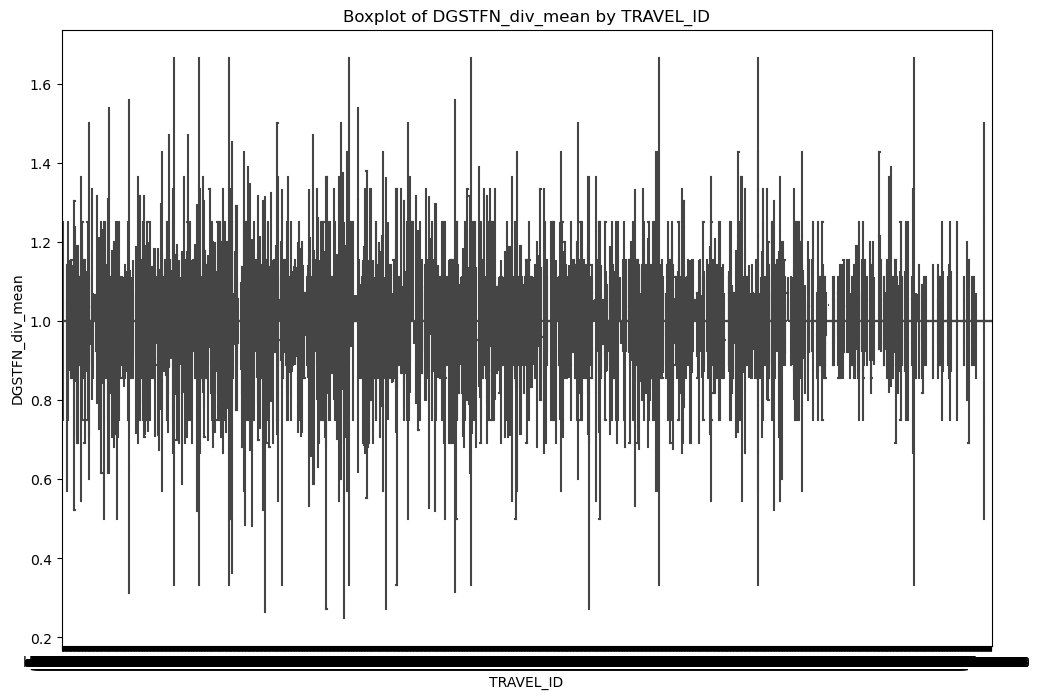

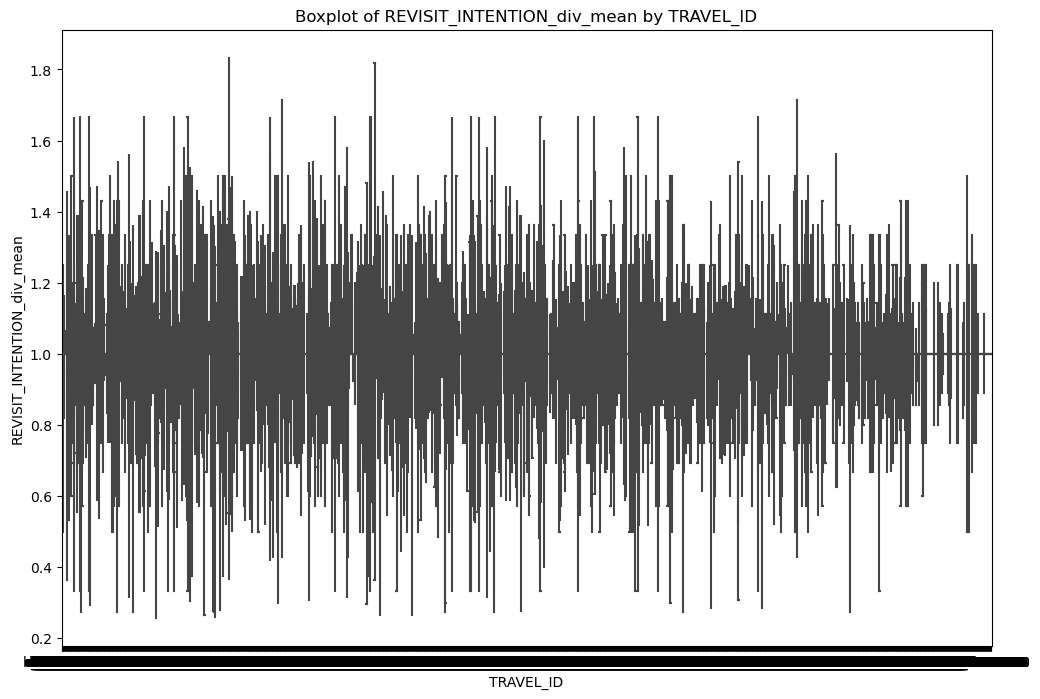

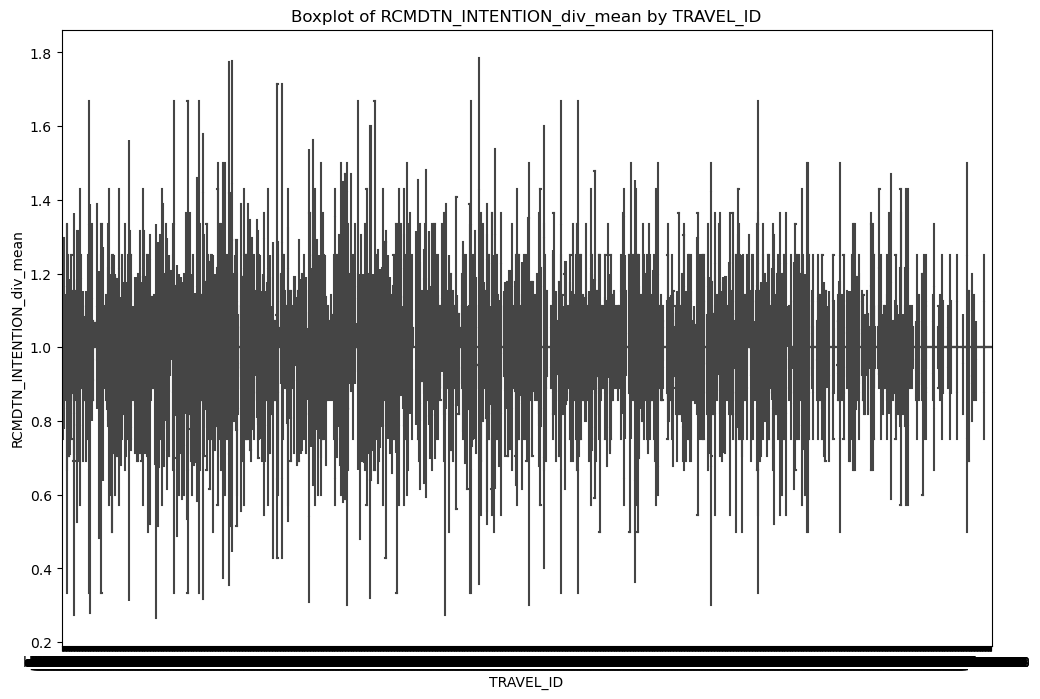

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

tmplst=['DGSTFN','REVISIT_INTENTION','RCMDTN_INTENTION']

for tmp in tmplst:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='TRAVEL_ID', y=f'{tmp}_div_mean', data=merged_df1, showfliers=False)
    plt.title(f'Boxplot of {tmp}_div_mean by TRAVEL_ID')
    plt.show()

In [36]:
merged_df1[['RCMDTN_INTENTION_div_mean','REVISIT_INTENTION_div_mean', 'DGSTFN_div_mean']].corr()

RCMDTN_INTENTION_div_mean  \
RCMDTN_INTENTION_div_mean                    1.000000   
REVISIT_INTENTION_div_mean                   0.818405   
DGSTFN_div_mean                              0.751192   

                            REVISIT_INTENTION_div_mean  DGSTFN_div_mean  
RCMDTN_INTENTION_div_mean                     0.818405         0.751192  
REVISIT_INTENTION_div_mean                    1.000000         0.695637  
DGSTFN_div_mean                               0.695637         1.000000

### 'RCMDTN_INTENTION_div_mean','REVISIT_INTENTION_div_mean', 'DGSTFN_div_mean'을 PCA(차원축소)을 사용하여
### 새로운 수치(new_variable)생성

In [37]:
from sklearn.decomposition import PCA
import pandas as pd

selected_columns = ['RCMDTN_INTENTION_div_mean', 'REVISIT_INTENTION_div_mean', 'DGSTFN_div_mean']
selected_df = merged_df1[selected_columns]

pca = PCA(n_components=1)
new_variable = pca.fit_transform(selected_df)

merged_df1['new_variable'] = new_variable

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.84915999]


In [38]:
merged_df1['new_variable']

0      -3.197832e-18
1       0.000000e+00
2      -5.965125e-01
3       4.850727e-02
4       2.411010e-01
            ...     
7118    0.000000e+00
7119    0.000000e+00
7120    2.082856e-01
7121   -2.695181e-01
7122   -7.545576e-02
Name: new_variable, Length: 7123, dtype: float64

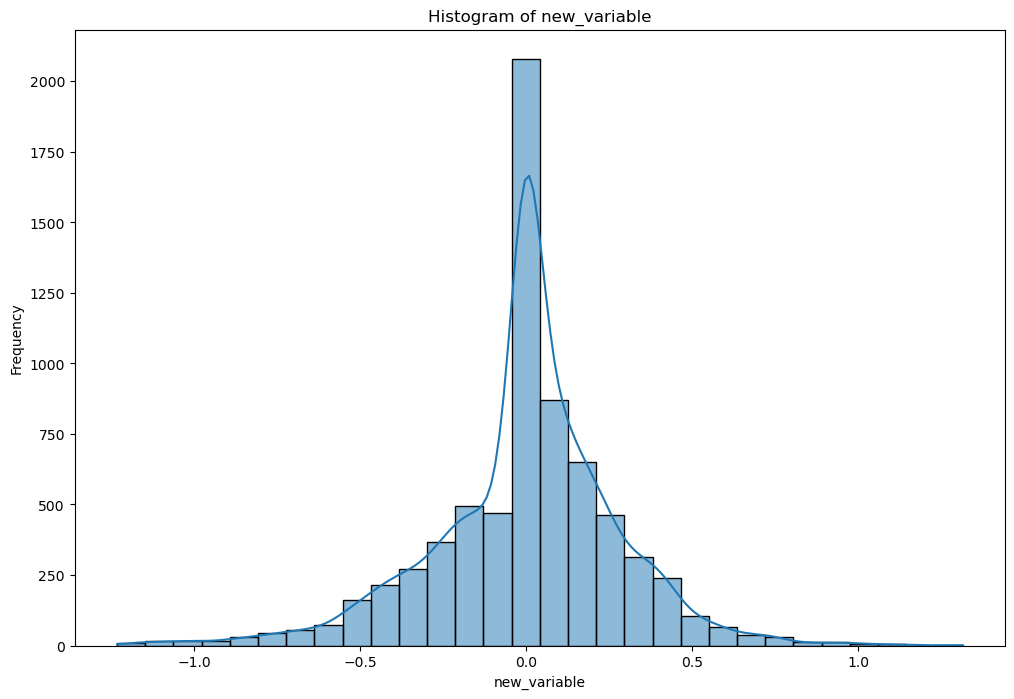

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.histplot(merged_df1['new_variable'], bins=30, kde=True)
plt.title('Histogram of new_variable')
plt.xlabel('new_variable')
plt.ylabel('Frequency')
plt.show()

### 'new_variable'의 0이상 값의 퍼센트 확인

In [40]:
len(merged_df1[merged_df1['new_variable']>=0])/len(merged_df1['new_variable'])

0.6550610697739716

## Train-Test split

In [41]:
df = merged_df1

In [42]:
from tqdm import tqdm
import numpy as np

df1 = df
Train = None  # 초기값을 None으로 설정

for i in tqdm(list(df['VISIT_AREA_NM'].unique())): # 유니크한 관광지 목록 중에서
    df2 = df1[df1['VISIT_AREA_NM'] == i] # 특정 관광지에 간 모든 사람 뽑아서
    np.random.seed(42)
    if df2.empty:
        pass
    else:
        random_number = np.random.randint(len(df2)) 
        df_id = df2.iloc[[random_number]] # 그 중 랜덤으로 관광지에 간 사람 한 명 뽑아서
        index = df_id.iloc[0,0]
        df3 = df1[df1['TRAVEL_ID'] == index] # 그 사람이 간 모든 관광지를 구해서

        if Train is None:
            Train = df3.copy()  # 초기값이 None일 경우, df3를 복사하여 할당
        else:
            Train = pd.concat([Train, df3], ignore_index=True)  # 이미 Train이 존재하면 concat으로 데이터를 추가

        df1 = pd.merge(df3, df1, how='outer', indicator=True)
        df1 = df1.query('_merge =="right_only"').drop(columns=['_merge']) # 기존 데이터프레임에서 그 사람 내용을 삭제

print(Train)

100%|██████████████████████████████████████████████████████████████████████████████| 1051/1051 [00:32<00:00, 32.19it/s]

      TRAVEL_ID  VISIT_AREA_NM   SI Dong_Eup  VISIT_AREA_TYPE_CD  DGSTFN  \
0     d_d007963      휴애리자연생활공원  서귀포      남원읍                   1     4.0   
1     d_d007963          해녀박물관   제주      구좌읍                   2     4.0   
2     d_d007963          한라수목원   제주       연동                   1     5.0   
3     d_d000825          검멀레해변   제주      우도면                   1     4.0   
4     d_d000825      서귀포매일올레시장  서귀포      서귀동                   4     4.0   
...         ...            ...  ...      ...                 ...     ...   
3381  d_d002090  휴애리자연생활공원 매표소  서귀포      남원읍                   1     1.0   
3382  d_d007150         제주동문시장   제주     일도일동                   4     4.0   
3383  d_d007150            비자림   제주      구좌읍                   1     4.0   
3384  d_d007150           섭지코지  서귀포      성산읍                   2     4.0   
3385  d_d007150       세화마을협동조합   제주      구좌읍                   4     4.0   

      REVISIT_INTENTION  RCMDTN_INTENTION  RESIDENCE_TIME_MIN  REVISIT_YN  \
0         

### Train, Test 이 8:2 비율이 되도록 조정

In [43]:
while len(df1) / len(df) > 0.2:
    np.random.seed(42)
    random_number = np.random.randint(len(df1))
    df_id = df1.iloc[[random_number]]
    index = df_id.iloc[0, 0]
    df3 = df1[df1['TRAVEL_ID'] == index]
    df1 = pd.merge(df3, df1, how='outer', indicator=True)
    df1 = df1.query('_merge =="right_only"').drop(columns=['_merge'])

    if Train is None:
        Train = pd.DataFrame(columns=list(df.columns))
    
    Train = pd.concat([Train, df3], ignore_index=True)

In [44]:
print(len(Train)) # train set 길이
print(len(df1)) # test set 길이
print(len(df))
print(len(df1) / len(df))

5700
1423
7123
0.19977537554401237


In [45]:
len(df1['TRAVEL_ID'].unique())

679

In [46]:
len(Train['TRAVEL_ID'].unique())

1524

### 방문지마다 체류시간 평균, 재방문여부의 평균, 동반자 수의 평균 산출

In [47]:
new_train = pd.DataFrame(columns = list(Train.columns) + ['RESIDENCE_TIME_MIN_mean', 'REVISIT_YN_mean', 'TRAVEL_COMPANIONS_NUM_mean'])

for i in tqdm(list(Train['VISIT_AREA_NM'].unique())): #유니크한 관광지 목록 중에서
    df2 = Train[Train['VISIT_AREA_NM'] == i] # 특정 관광지에 간 모든 사람 뽑아서
    for j in ['RESIDENCE_TIME_MIN', 'REVISIT_YN', 'TRAVEL_COMPANIONS_NUM']:
        #체류시간 평균 산출 
        globals()[str(j)+'_mean'] = df2[str(j)]
        globals()[str(j)+'_mean'] = np.mean(globals()[str(j)+'_mean'])
        #데이터프레임에 들어가게 값을 리스트 형태로 변환
        globals()[str(j)+'_mean'] = np.repeat(globals()[str(j)+'_mean'], len(df2)) 
        df2[str(j)+'_mean'] = globals()[str(j)+'_mean']
    #새로운 데이터프레임에 방문지별 평균값 대입
    new_train = pd.concat([new_train, df2], axis = 0)

  0%|                                                                                         | 0/1051 [00:00<?, ?it/s]C:\Users\401-6\AppData\Local\Temp\ipykernel_14244\930919718.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[str(j)+'_mean'] = globals()[str(j)+'_mean']
C:\Users\401-6\AppData\Local\Temp\ipykernel_14244\930919718.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[str(j)+'_mean'] = globals()[str(j)+'_mean']
C:\Users\401-6\AppData\Local\Temp\ipykernel_14244\930919718.py:11: Sett

### 편의를 위해 유저별 정렬

In [48]:
new_train.sort_values(by = ['TRAVEL_ID'], axis = 0, inplace = True)

### Train, Test set 저장

In [49]:
new_train.to_csv('관광지 추천시스템 Trainset.csv', index = False)
df1.to_csv('관광지 추천시스템 Testset.csv', index = False)

## Train, Test set 불러오기

In [50]:
import pandas as pd
import numpy as np
Train = pd.read_csv('관광지 추천시스템 Trainset.csv')
test = pd.read_csv('관광지 추천시스템 Testset.csv')

In [51]:
print(Train.shape)
print(test.shape)

(5700, 33)
(1423, 30)


In [52]:
Train

TRAVEL_ID VISIT_AREA_NM   SI Dong_Eup  VISIT_AREA_TYPE_CD  DGSTFN  \
0     a_a000317        이중섭미술관  서귀포      서귀동                   3     5.0   
1     a_a000317         돈내코계곡  서귀포      상효동                   1     4.0   
2     a_a000317         천제연폭포  서귀포      중문동                   1     5.0   
3     a_a000317        협재해수욕장   제주      한림읍                   1     4.0   
4     a_a000317          섭지코지  서귀포      성산읍                   1     4.0   
...         ...           ...  ...      ...                 ...     ...   
5695  d_d012472        여미지식물원  서귀포      색달동                   6     3.0   
5696  d_d012472         감귤박물관  서귀포      신효동                   2     3.0   
5697  d_d012472     서귀포매일올레시장  서귀포      서귀동                   4     4.0   
5698  d_d012472           관음사   제주     아라일동                   2     5.0   
5699  d_d012488       산방산탄산온천  서귀포      안덕면                   6     5.0   

      REVISIT_INTENTION  RCMDTN_INTENTION  RESIDENCE_TIME_MIN  REVISIT_YN  \
0                   5.0               5.0                60.0           0   
1                   5.0               5.0                90.0           0   
2                   5.0               5.0                90.0           0   
3                   4.0               4.0               120.0           0   
4                   3.0               3.0                60.0           0   
...                 ...               ...                 ...         ...   
5695                3.0               3.0                60.0           1   
5696                3.0               3.0                60.0           0   
5697                4.0               4.0                30.0           1   
5698                5.0               5.0                60.0           1   
5699                4.0               5.0                90.0           1   

      ... TRAVEL_MOTIVE_1  TRAVEL_NUM TRAVEL_COMPANIONS_NUM  DGSTFN_div_mean  \
0     ...             2.0           3                     3         1.136364   
1     ...             2.0           3                     3         0.909091   
2     ...             2.0           3                     3         1.136364   
3     ...             2.0           3                     3         0.909091   
4     ...             2.0           3                     3         0.909091   
...   ...             ...         ...                   ...              ...   
5695  ...             1.0           1                     4         0.800000   
5696  ...             1.0           1                     4         0.800000   
5697  ...             1.0           1                     4         1.066667   
5698  ...             1.0           1                     4         1.333333   
5699  ...             2.0           2                     0         1.000000   

      REVISIT_INTENTION_div_mean  RCMDTN_INTENTION_div_mean  new_variable  \
0                       1.136364                   1.136364      0.232766   
1                       1.136364                   1.136364      0.132500   
2                       1.136364                   1.136364      0.232766   
3                       0.909091                   0.909091     -0.155177   
4                       0.681818                   0.681818     -0.442854   
...                          ...                        ...           ...   
5695                    0.800000                   0.800000     -0.341390   
5696                    0.800000                   0.800000     -0.341390   
5697                    1.066667                   1.066667      0.113797   
5698                    1.333333                   1.333333      0.568983   
5699                    1.000000                   1.000000      0.000000   

      RESIDENCE_TIME_MIN_mean  REVISIT_YN_mean  TRAVEL_COMPANIONS_NUM_mean  
0                   41.538462         0.307692                    0.730769  
1                   60.000000         0.000000                    1.500000  
2                   67.241379         0.172414                 

## 4번 이상 방문한 곳으로만 필터링

In [53]:
count = pd.DataFrame(Train['VISIT_AREA_NM'].value_counts())

In [54]:
print(list(count.groupby(['VISIT_AREA_NM'])['VISIT_AREA_NM']))

[(1, 모슬포교회 역사관     1
삼매봉공원         1
은희네해장국 본점     1
마농치킨 본점       1
제주맥주 양조장      1
             ..
코난해변          1
선덕사           1
서귀포항여객선터미널    1
보미다           1
제주소나이         1
Name: VISIT_AREA_NM, Length: 633, dtype: int64), (2, 야크마을               2
더마파크 더마카트          2
다이나믹메이즈 제주도성읍점     2
효명사                2
캐니언파크 제주점          2
                  ..
제주로컬 썸제주           2
포토이즘박스 서귀포올레시장점    2
낙천의자공원             2
봄사무소               2
이쁜선물가게             2
Name: VISIT_AREA_NM, Length: 148, dtype: int64), (3, 법화사                           3
제주동문수산시장                      3
새빌                            3
제주4.3평화공원 제주4.3평화기념관          3
스파오 제주중앙로점                    3
메리어트관 제주신화월드호텔앤리조트 모실클럽하우스    3
오늘은카트레이싱                      3
에이스서프                         3
팜파스 갈대정원                      3
걸매생태공원                        3
방림원                           3
제주드림타워                        3
한림수협마트                        3
주상절리대                         3
한림수협위판장                       3
제주

In [55]:
count

VISIT_AREA_NM
서귀포매일올레시장             333
함덕해수욕장                250
협재해수욕장                204
제주동문시장                199
제주동문재래시장              141
...                   ...
코난해변                    1
선덕사                     1
서귀포항여객선터미널              1
보미다                     1
제주소나이                   1

[1051 rows x 1 columns]

In [56]:
count = pd.DataFrame(Train['VISIT_AREA_NM'].value_counts())
count['places'] = count.index
four_places = list(count[count['VISIT_AREA_NM']>=4]['places'])

for i in range(len(Train)):
    if Train['VISIT_AREA_NM'][i] not in four_places:
        Train = Train.drop([i], axis = 0)
Train.reset_index(drop = True, inplace = True)

In [57]:
count1 = pd.DataFrame(Train['VISIT_AREA_NM'].value_counts())
count_result = count1.groupby(['VISIT_AREA_NM']).size()
print(count_result)

VISIT_AREA_NM
4      39
5      25
6      14
7      13
8      18
9       9
10      6
11      9
12      5
13      4
14      4
15      2
16      3
17      1
18      3
19      4
20      3
21      1
22      1
23      1
24      1
25      3
26      4
27      3
28      3
29      2
30      1
31      1
32      2
38      1
42      1
43      2
47      1
48      1
50      2
53      1
57      1
58      1
61      1
63      1
64      1
68      1
70      1
78      1
82      1
86      1
87      1
120     1
127     1
128     1
141     1
199     1
204     1
250     1
333     1
dtype: int64


### 필터링으로 소실된 'TRAVEL_ID'비율

In [58]:
Train.shape

(4600, 33)

In [59]:
(len(Train['TRAVEL_ID'].unique())+len(test['TRAVEL_ID'].unique()))/2204

0.9523593466424682

In [60]:
len(Train['TRAVEL_ID'].unique())

1420

In [61]:
len(test['TRAVEL_ID'].unique())

679

In [62]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TRAVEL_ID                   4600 non-null   object 
 1   VISIT_AREA_NM               4600 non-null   object 
 2   SI                          4600 non-null   object 
 3   Dong_Eup                    4600 non-null   object 
 4   VISIT_AREA_TYPE_CD          4600 non-null   int64  
 5   DGSTFN                      4600 non-null   float64
 6   REVISIT_INTENTION           4600 non-null   float64
 7   RCMDTN_INTENTION            4600 non-null   float64
 8   RESIDENCE_TIME_MIN          4600 non-null   float64
 9   REVISIT_YN                  4600 non-null   int64  
 10  TRAVELER_ID                 4600 non-null   object 
 11  TRAVEL_MISSION_PRIORITY     4600 non-null   int64  
 12  GENDER                      4600 non-null   object 
 13  AGE_GRP                     4600 

## 초모수 조절

In [63]:
Train.columns

Index(['TRAVEL_ID', 'VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD',
       'DGSTFN', 'REVISIT_INTENTION', 'RCMDTN_INTENTION', 'RESIDENCE_TIME_MIN',
       'REVISIT_YN', 'TRAVELER_ID', 'TRAVEL_MISSION_PRIORITY', 'GENDER',
       'AGE_GRP', 'INCOME', 'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3',
       'TRAVEL_STYL_4', 'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7',
       'TRAVEL_STYL_8', 'TRAVEL_MOTIVE_1', 'TRAVEL_NUM',
       'TRAVEL_COMPANIONS_NUM', 'DGSTFN_div_mean',
       'REVISIT_INTENTION_div_mean', 'RCMDTN_INTENTION_div_mean',
       'new_variable', 'RESIDENCE_TIME_MIN_mean', 'REVISIT_YN_mean',
       'TRAVEL_COMPANIONS_NUM_mean'],
      dtype='object')

In [64]:
Train.drop(['TRAVELER_ID', 'REVISIT_INTENTION',
            'RCMDTN_INTENTION','DGSTFN','DGSTFN_div_mean','RESIDENCE_TIME_MIN', 'REVISIT_YN',
           'RCMDTN_INTENTION_div_mean','REVISIT_INTENTION_div_mean'], axis = 1, inplace = True)
test.drop(['TRAVELER_ID', 'REVISIT_INTENTION',
            'RCMDTN_INTENTION','DGSTFN','DGSTFN_div_mean','RESIDENCE_TIME_MIN', 'REVISIT_YN',
           'RCMDTN_INTENTION_div_mean','REVISIT_INTENTION_div_mean'], axis = 1, inplace = True)

In [65]:
len(Train.columns)

24

In [66]:
len(test.columns)

21

In [67]:
Train['VISIT_AREA_TYPE_CD'] = Train['VISIT_AREA_TYPE_CD'].astype('string')
test['VISIT_AREA_TYPE_CD'] = test['VISIT_AREA_TYPE_CD'].astype('string')
Train['TRAVEL_MOTIVE_1'] = Train['TRAVEL_MOTIVE_1'].astype('int64')
test['TRAVEL_MOTIVE_1'] = test['TRAVEL_MOTIVE_1'].astype('int64')
y_train = Train['new_variable']
X_train = Train.drop(['new_variable'], axis = 1)

In [197]:
!pip install scikit-learn
!pip install tqdm
!pip install catboost

In [68]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
import joblib
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore') #warning 문구 제거
pd.set_option('display.max_columns', None)

In [69]:
print(X_train.info())
print(y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TRAVEL_ID                   4600 non-null   object 
 1   VISIT_AREA_NM               4600 non-null   object 
 2   SI                          4600 non-null   object 
 3   Dong_Eup                    4600 non-null   object 
 4   VISIT_AREA_TYPE_CD          4600 non-null   string 
 5   TRAVEL_MISSION_PRIORITY     4600 non-null   int64  
 6   GENDER                      4600 non-null   object 
 7   AGE_GRP                     4600 non-null   int64  
 8   INCOME                      4600 non-null   int64  
 9   TRAVEL_STYL_1               4600 non-null   int64  
 10  TRAVEL_STYL_2               4600 non-null   int64  
 11  TRAVEL_STYL_3               4600 non-null   int64  
 12  TRAVEL_STYL_4               4600 non-null   int64  
 13  TRAVEL_STYL_5               4600 

In [71]:
def cross_validation(X_train, y_train, cv, iteration, number, random_state): #X_train 데이터, y_train 데이터, cv 개수, random search 횟수, random_state

    X_train1 = X_train #변수 옮기기
    y_train1 = y_train #변수 옮기기
    for i in range(cv): #각 fold마다의 X_train, y_train 생성 (Train_1, Train_2, ... / target_1, target_2, ...)
        globals()['Train_'+str(i+1)] = pd.DataFrame(columns = list(X_train.columns))
        globals()['target_'+str(i+1)] = []
    print(str(cv)+'개의 fold를 생성중입니다.....')
    for i in tqdm(range(cv)):
        np.random.seed(random_state) #초기 시드 설정
        while (len(globals()['Train_'+str(i+1)]) / len(X_train)) < (1/cv): #1/cv 비율 만큼의 데이터가 모일 때까지
            random_number = np.random.randint(len(X_train1))
            df_id = X_train1.iloc[[random_number]]
            index = df_id.iloc[0,0] #랜덤하게 유저를 선택하고
            df1 = X_train1[X_train1['TRAVEL_ID'] == index] #그 유저가 갔던 모든 여행지 불러오고
            target_index = X_train1[X_train1['TRAVEL_ID'] == index].index
            X_train1 = pd.merge(df1, X_train1, how = 'outer', indicator = True)
            X_train1 = X_train1.query('_merge =="right_only"').drop(columns = ['_merge']) #기존 데이터프레임은 해당 유저 정보 삭제
            globals()['Train_'+str(i+1)] = globals()['Train_'+str(i+1)].append(df1) #validation set에 유저의 X_train 삽입
            globals()['target_'+str(i+1)].extend(list(y_train[list(target_index)])) #유저의 X_train에 상응하는 y_train 삽입
            if len(X_train1) == 0: #기존 데이터프레임에 모든 유저정보가 사라지면 validation set 생성이 완료된 것이므로 정지
                break
    print(str(cv)+'개의 fold 생성이 완료되었습니다!')
    print('함수에서 설정한 초모수 범위 내에서 ' + str(cv)+'개의 validation 검정을 진행합니다...' )
    
    
    np.random.seed(random_state)
    initial = 0 
    for a in tqdm(range(iteration)):
        print(str(a+1) + "번째 초모수 조절치에 대한 학습을 진행합니다....")
        n_estimators = np.random.choice(np.arange(1580, 1611, 10))

        print(n_estimators)

        final_recall = [] # K개의 검증 성능이 들어갈 리스트

        for j in range(cv): #K개 fold중
            print(str(a+1) + '번째 초모수 조절치의' + str(j+1)+'번째 fold를 학습하고 있습니다....')
            #한 fold에 대해서 학습
            combine_df_list = list(range(1, (cv+1))) # 1부터 cv까지 숫자리스트 만들어서
            del combine_df_list[j] #숫자 하나를 지우고, 그 숫자가 있는 Train set을 Validation set으로 설정
            #예를 들어 1이 빠졌으면 Train_1이 validation set, Train_2, Train_3, ... 는 Train set
            X_new_train = pd.DataFrame(columns = list(globals()['Train_'+str(j+1)].columns))
            y_new_train = []
            for i in combine_df_list: #지운 숫자 외의 숫자가 있는 Train set들을 결합
                X_new_train = pd.concat([X_new_train, globals()['Train_'+str(i)]], axis = 0) #X_train 결합
                y_new_train.extend(globals()['target_'+str(i)]) #y_train 결합
            y_new_train = np.array(y_new_train).astype(np.float64)
            X_new_train.drop(['TRAVEL_ID'], axis = 1, inplace = True) #필요 없는 컬럼 제거
            if 'new_feature' in list(X_new_train.columns): #global 함수에서 발생하는 오류 해결
                X_new_train.drop(['new_feature'], axis = 1, inplace = True)
            model = CatBoostRegressor(n_estimators = n_estimators,
                                  cat_features = ['VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD',
                                              'TRAVEL_MISSION_PRIORITY', 'AGE_GRP', 'GENDER','TRAVEL_MOTIVE_1'], 
                                  random_state = 42)
        ##############################################################################################

            model.fit(X_new_train, y_new_train) #########모델 적합

            #학습한 fold에 대한 test 값 도출
            recall_10_list = [] #validation set의 recall 측정값들이 들어갈 리스트
            #####################유저 정보##################################
            data = globals()['Train_'+str(j+1)][['TRAVEL_ID', 'SI', 'Dong_Eup', 'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                                    'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                                    'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                                    'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM']]
            data1 = pd.DataFrame(columns=['TRAVEL_ID', 'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                                    'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                                    'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                                    'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM', 'sido_gungu_list'])
            for i in list(data['TRAVEL_ID'].unique()):
                temp_df = data[data['TRAVEL_ID'] == i]
                temp_df1 = temp_df[['SI', 'Dong_Eup']] #각 유저별 방문한 시군구 확인
                temp_df1.reset_index(drop = True, inplace = True)
                sido_gungu_visit = []
                for k in range(len(temp_df1)):
                    sido_gungu_visit.append(temp_df1['SI'][k] + '+' + temp_df1['Dong_Eup'][k])
                sido_gungu_list = list(set(sido_gungu_visit))
                new = temp_df.drop(['SI', 'Dong_Eup'], axis = 1) #기존 시도, 군구 제외하고
                new = new.head(1)
                new['sido_gungu_list'] = str(sido_gungu_list)
                data1 = pd.concat([data1, new], axis = 0) #새로운 데이터프레임 생성 
            data1.reset_index(drop = True, inplace = True)
            ##########################여행지 정보################################
            info = X_new_train[['VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD','RESIDENCE_TIME_MIN_mean',
            'REVISIT_YN_mean', 'TRAVEL_COMPANIONS_NUM_mean']]
            info.drop_duplicates(['VISIT_AREA_NM'], inplace = True)
            ###### number회 이상 관광한 방문지 리스트 생성
            visiting_list = X_new_train[['VISIT_AREA_NM']] #train set에 있는 방문지에 대해서만 number회 이상 방문하였는지 확인
            visiting_list.reset_index(drop = True, inplace = True)
            #데이터 전처리
            dfdf = pd.DataFrame(visiting_list.value_counts(), columns = ['count'])
            dfdf['VISIT_AREA_NM'] = dfdf.index
            dfdf.reset_index(drop = True, inplace = True)
            for i in range(len(dfdf)):
                dfdf['VISIT_AREA_NM'][i] = str(dfdf['VISIT_AREA_NM'][i])
                dfdf['VISIT_AREA_NM'][i] = dfdf['VISIT_AREA_NM'][i].replace("(","").replace(")","").replace(",","").replace("\''","")
                dfdf['VISIT_AREA_NM'][i] = dfdf['VISIT_AREA_NM'][i][1:-1]
            #n회 이상 적용
            dfdf = dfdf[dfdf['count'] >= number] 
            visit_list = list(dfdf['VISIT_AREA_NM']) #visit_list에 number회 이상 방문지 리스트
            #방문지가 number회 이상 방문한 관광지 아니면 제거
            info.reset_index(drop = True, inplace = True)
            for i in range(len(info)):
                if info['VISIT_AREA_NM'][i] not in visit_list:
                    info = info.drop([i], axis = 0)
            info.reset_index(drop = True, inplace = True)
            ##########################모델 10개 관광지 추천############################
            result = []
            for i in range(len(data1)):
                #데이터

                final_df = pd.DataFrame(columns = ['VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD',
                       'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                       'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                       'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                       'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM',
                       'RESIDENCE_TIME_MIN_mean', 'REVISIT_YN_mean',
                       'TRAVEL_COMPANIONS_NUM_mean']) #빈 데이터프레임에 내용 추가
                ####### 시/도 군/구 별 자료 수집
                temp = data1['sido_gungu_list'][i].replace("[","").replace("]","").replace("\'","").replace(", ",",")
                places_list = list(map(str, temp.split(",")))
                for q in places_list:
                    si, dong_eup = map(str, q.split("+"))

                    info_df = info[(info['SI'] == si) & (info['Dong_Eup'] == dong_eup)] 

                    info_df.drop(['SI'], inplace = True, axis = 1)
                    info_df.reset_index(inplace = True, drop = True)
                    data2 = data1.drop(['sido_gungu_list'], axis =1)
                    user_df = pd.DataFrame([data2.iloc[i].to_list()]*len(info_df), columns = ['SI', 'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                                        'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                                        'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                                        'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM'])
                    df = pd.concat([user_df, info_df], axis = 1)
                    df = df[['VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD',
                   'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                   'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                   'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                   'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM',
                   'RESIDENCE_TIME_MIN_mean', 'REVISIT_YN_mean',
                   'TRAVEL_COMPANIONS_NUM_mean']] # 변수정렬
                    df['VISIT_AREA_TYPE_CD'] = df['VISIT_AREA_TYPE_CD'].astype('string')
                    final_df = pd.concat([final_df, df], axis = 0)
                final_df.reset_index(drop = True, inplace = True)
                final_df.drop_duplicates(['VISIT_AREA_NM'], inplace = True)

                #모델 예측
                y_pred = model.predict(final_df)
                y_pred = pd.DataFrame(y_pred, columns = ['y_pred'])
                test_df1 = pd.concat([final_df, y_pred], axis = 1)
                test_df1.sort_values(by = ['y_pred'], axis = 0, ascending=False, inplace = True) # 예측치가 높은 순대로 정렬

                test_df1 = test_df1.iloc[0:10,] #상위 10개 관광지 추천

                visiting_candidates = list(test_df1['VISIT_AREA_NM']) # 모델이 추천한 관광지들을 리스트 형태로 변환

               # 유저정보와 추천 관광지
                test_df2 = test_df1[['SI','TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                                    'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                                    'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                                    'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM']]
                if len(test_df2) == 0:
                    rec = []
                    result.append(rec)
                else:

                    rec = test_df2.iloc[0].to_list()

                    rec.append(visiting_candidates)

                    result.append(rec)
            final_df = pd.DataFrame(result,
                                columns = ['SI', 'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                                'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                                'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                                'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM', 'recommend_result_place'])
            final_df = final_df[['recommend_result_place']]
            travel_id = data1[['TRAVEL_ID']]
            travel_id.reset_index(drop = True, inplace = True)
            final_df = pd.concat([travel_id, final_df], axis = 1)

            #추천지 10개 미만인 여행 ID확인
            travel_id_list = []
            for i in range(len(final_df)):
                recommend_list = final_df['recommend_result_place'][i]
                if str(recommend_list).count(',') < 9:
                    travel_id_list.append(final_df['TRAVEL_ID'][i])
                if pd.isna(str(recommend_list)):
                    travel_id_list.append(final_df['TRAVEL_ID'][i])
            ## 군구 리스트
            places = list(set(globals()['Train_'+str(j+1)]['Dong_Eup']))
            for i in range(len(places)):
                if places[i][-1] == '동' or places[i][-1] == '읍' or places[i][-1] == '면':
                    places[i] = places[i][:-1]

            ###############################################################
            ######## 최종 성능 평가 #########################################
            #########################################################
            visit_list = list(info['VISIT_AREA_NM'])
            globals()['Train_'+str(j+1)]['new_feature'] = globals()['target_'+str(j+1)]



            for i in list(globals()['Train_'+str(j+1)]['TRAVEL_ID'].unique()):

                #추천한 방문지가 10개 미만이면 0
                if i in travel_id_list:
                    recall_10_list.append(0)
                    continue

                satisfied = globals()['Train_'+str(j+1)][globals()['Train_'+str(j+1)]['TRAVEL_ID'] == i] #실제(y_actual) 관광객이 만족한 관광지
                satisfied.reset_index(drop = True, inplace = True) 


                satisfied1 = satisfied[satisfied['new_feature'] >=0 ] #만족의 기준은 new_feature가 0이상 일때만 만족이라고 정의
                if len(satisfied1) == 0: # 유저가 만족한 관광지가 하나도 없으면 recall@10은 어차피 0
                    recall_10_list.append(0)
                    continue
                else:
                    item_list = satisfied1['VISIT_AREA_NM']


                item_list = list(set(item_list))


            #final_df의 추천지 10개랑 비교

                recommend_list = final_df[final_df['TRAVEL_ID'] == i]['recommend_result_place'] #모델 추천 관광지 10개

                summ = 0
                for n in item_list:
                    word_list = list(n.split(' '))
                    if word_list[-1][-1] == '점': #지점명 삭제
                        del word_list[-1]
                    for o in word_list:
                        if o in places:#장소에 군/구 명 있으면 아무것도 하지 않고 스킵
                            pass
                        else:
                            for p in recommend_list: #장소에 교차어 있으면 해당 장소는 방문했다고 인식하기
                                if o in str(p) :
                                    summ += 1
                recall10_for_1user = summ / min(10, len(satisfied1)) #recall@10 산식
                if recall10_for_1user > 1:
                    recall10_for_1user = 1
                recall_10_list.append(recall10_for_1user)
            globals()['Train_'+str(j+1)].drop(['new_feature'], axis = 1, inplace = True) #globals 함수 오류 해결하기 위한 코드
            
            recall_for_one_cv = sum(recall_10_list) / len(recall_10_list) #한 fold에 대한 recall@10값 추출
                
            final_recall.append(recall_for_one_cv)

        recallat10 = sum(final_recall) / len(final_recall)
        print('이번 결과는:', recallat10)
        ###################### hyperparameter 바꾸면 여기도 수정해야 ######################
        ###################################################################################
        print('이번 결과의 parameter은: ', 'n_estimators:', n_estimators)
        if recallat10 > initial:
            initial = recallat10
            print('신기록!:', initial)
            print('n_estimators:', n_estimators)
            final_estimator = n_estimators

         #####################################################################################
    print('최종 parameter은 :',  final_estimator)
    return(initial)

In [70]:
cross_validation(X_train, y_train, cv = 10, iteration = 2, number = 2, random_state = 42)

NameError: name 'cross_validation' is not defined

In [72]:
y_train = Train['new_variable']
X_train = Train.drop(['new_variable', 'TRAVEL_ID'], axis = 1)

In [73]:
model = CatBoostRegressor(n_estimators = 1610,
                          cat_features = ['VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD',
                                              'TRAVEL_MISSION_PRIORITY', 'AGE_GRP', 'GENDER','TRAVEL_MOTIVE_1'])
model.fit(X_train, y_train)

Learning rate set to 0.035379
0:	learn: 0.2901548	total: 164ms	remaining: 4m 24s
1:	learn: 0.2897908	total: 179ms	remaining: 2m 24s
2:	learn: 0.2893915	total: 195ms	remaining: 1m 44s
3:	learn: 0.2889808	total: 211ms	remaining: 1m 24s
4:	learn: 0.2885959	total: 225ms	remaining: 1m 12s
5:	learn: 0.2883600	total: 239ms	remaining: 1m 3s
6:	learn: 0.2881206	total: 252ms	remaining: 57.8s
7:	learn: 0.2878422	total: 266ms	remaining: 53.2s
8:	learn: 0.2876105	total: 279ms	remaining: 49.6s
9:	learn: 0.2874093	total: 292ms	remaining: 46.7s
10:	learn: 0.2871509	total: 306ms	remaining: 44.5s
11:	learn: 0.2869416	total: 320ms	remaining: 42.6s
12:	learn: 0.2868546	total: 324ms	remaining: 39.8s
13:	learn: 0.2867277	total: 332ms	remaining: 37.8s
14:	learn: 0.2866356	total: 336ms	remaining: 35.7s
15:	learn: 0.2864507	total: 348ms	remaining: 34.7s
16:	learn: 0.2862437	total: 361ms	remaining: 33.8s
17:	learn: 0.2859449	total: 374ms	remaining: 33.1s
18:	learn: 0.2857254	total: 388ms	remaining: 32.5s
19:	le

In [74]:
now = time
print(now.strftime('%Y-%m-%d %H:%M:%S'))

2024-01-19 09:35:28


In [75]:
joblib.dump(model,'catboost_model.pkl')

['catboost_model.pkl']

In [76]:
modeld = joblib.load('catboost_model.pkl')
traind = pd.read_csv('관광지 추천시스템 Trainset.csv')
testd = pd.read_csv('관광지 추천시스템 Testset.csv')

In [77]:
print(len(Train['TRAVEL_ID'].unique()))
print(len(test['TRAVEL_ID'].unique()))

1420
679


In [78]:
y_testd = testd['new_variable']
X_testd = testd.drop(['new_variable'], axis = 1)

### test 'sido_gungu_list'추가

In [79]:
data = testd[['TRAVEL_ID', 'SI','Dong_Eup', 'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                            'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                            'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                            'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM']]

In [80]:
data1 = pd.DataFrame(columns=['TRAVEL_ID', 'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                            'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                            'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                            'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM', 'sido_gungu_list'])
for i in tqdm(list(data['TRAVEL_ID'].unique())):
    temp_df = data[data['TRAVEL_ID'] == i]
    temp_df1 = temp_df[['SI','Dong_Eup']] #각 유저별 방문한 시군구 확인
    temp_df1.reset_index(drop = True, inplace = True)
    sido_gungu_visit = []
    for j in range(len(temp_df1)):
        sido_gungu_visit.append(temp_df1['SI'][j] + '+' + temp_df1['Dong_Eup'][j])
    sido_gungu_list = list(set(sido_gungu_visit))
    new = temp_df.drop(['SI','Dong_Eup'], axis = 1) #기존 시도, 군구 제외하고
    new = new.head(1)
    new['sido_gungu_list'] = str(sido_gungu_list)
    data1 = pd.concat([data1, new], axis = 0) #새로운 데이터프레임 생성     

100%|███████████████████████████████████████████████████████████████████████████████| 679/679 [00:01<00:00, 475.30it/s]


In [81]:
#유저 정보 저장
data1.reset_index(drop = True, inplace = True)
data1.to_csv('관광지 추천시스템 Testset- 유저 정보.csv', index=False)

In [82]:
#여행지 정보
info = traind[['VISIT_AREA_NM','SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD','RESIDENCE_TIME_MIN_mean','REVISIT_YN_mean', 'TRAVEL_COMPANIONS_NUM_mean']]
info.drop_duplicates(['VISIT_AREA_NM'], inplace = True)

### 4회 이상 방문한 train set에 있는 방문지

In [83]:
visiting_list = traind[['VISIT_AREA_NM']] 
visiting_list.reset_index(drop = True, inplace = True)

dfdf = pd.DataFrame(visiting_list.value_counts(), columns = ['count'])
dfdf['VISIT_AREA_NM'] = dfdf.index
dfdf.reset_index(drop = True, inplace = True)
for i in range(len(dfdf)):
    dfdf['VISIT_AREA_NM'][i] = str(dfdf['VISIT_AREA_NM'][i])
    dfdf['VISIT_AREA_NM'][i] = dfdf['VISIT_AREA_NM'][i].replace("(","").replace(")","").replace(",","").replace("\''","")
    dfdf['VISIT_AREA_NM'][i] = dfdf['VISIT_AREA_NM'][i][1:-1]

dfdf = dfdf[dfdf['count'] >= 4]
visit_list = list(dfdf['VISIT_AREA_NM'])

주어진 코드에서 traind 데이터프레임에서 방문지를 추출하여 해당 방문지가 2회 이상 방문된 경우를 확인하는 과정입니다. 여기서 사용된 핵심 단계는 다음과 같습니다:

traind 데이터프레임에서 'VISIT_AREA_NM' 열을 추출하여 visiting_list 데이터프레임을 만듭니다.
'VISIT_AREA_NM' 열에 대해 값의 등장 횟수를 세고, 이를 새로운 데이터프레임 dfdf에 저장합니다.
dfdf에 새로운 열 'count'를 추가하고, 해당 방문지를 표현하는 문자열에서 불필요한 문자들을 제거합니다.
dfdf에서 'count'가 4 이상인 경우만 선택하여 visit_list에 해당 방문지를 리스트로 저장합니다.
즉, 'VISIT_AREA_NM' 열에 있는 각 방문지에 대해 4회 이상 방문된 경우를 확인하고, 해당 방문지를 visit_list에 담아냅니다. 이렇게 생성된 visit_list는 2회 이상 방문한 방문지의 목록을 나타냅니다.

In [84]:
#방문지가 4회 이상 방문한 관광지 아니면 제거
info.reset_index(drop = True, inplace = True)
for i in tqdm(range(len(info))):
    if info['VISIT_AREA_NM'][i] not in visit_list:
        info = info.drop([i], axis = 0)
info.reset_index(drop = True, inplace = True)

100%|████████████████████████████████████████████████████████████████████████████| 1051/1051 [00:00<00:00, 3959.60it/s]


In [85]:
#여행자 정보 저장
info.reset_index(drop = True, inplace = True)
info.to_csv( '관광지 추천시스템 Testset- 여행지 정보.csv', index=False)

In [86]:
print(len(info['VISIT_AREA_NM'].unique()))
print(len(Train['VISIT_AREA_NM'].unique()))

212
213


In [87]:
if data.equals(data1):
    print('good')

In [88]:
data = pd.read_csv('관광지 추천시스템 Testset- 유저 정보.csv')
info = pd.read_csv('관광지 추천시스템 Testset- 여행지 정보.csv')

In [124]:
result = []
for i in tqdm(range(len(data1))):

    final_df = pd.DataFrame(columns = ['VISIT_AREA_NM', 'SI','Dong_Eup', 'VISIT_AREA_TYPE_CD',
           'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
           'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
           'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
           'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM',
           'RESIDENCE_TIME_MIN_mean', 'REVISIT_YN_mean',
           'TRAVEL_COMPANIONS_NUM_mean'])
    ####### 시/도 군/구 별 자료 수집
    temp = data['sido_gungu_list'][i].replace("[","").replace("]","").replace("\'","").replace(", ",",")
    places_list = list(map(str, temp.split(",")))
    for q in places_list:
        si,dong_eup = map(str, q.split("+"))

        info_df = info[(info['SI'] == si) & (info['Dong_Eup'] == dong_eup)]

        info_df.drop(['SI'], inplace = True, axis = 1)
        info_df.reset_index(inplace = True, drop = True)
        data2 = data1.drop(['sido_gungu_list'], axis =1)
        user_df = pd.DataFrame([data2.iloc[i].to_list()]*len(info_df), columns = ['SI', 'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                            'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                            'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                            'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM'])
        print(user_df)
        print(info_df)
        df = pd.concat([user_df, info_df], axis = 1)
        df = df[['VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD',
       'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
       'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
       'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
       'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM',
       'RESIDENCE_TIME_MIN_mean', 'REVISIT_YN_mean',
       'TRAVEL_COMPANIONS_NUM_mean']] # 변수정렬
        df['VISIT_AREA_TYPE_CD'] = df['VISIT_AREA_TYPE_CD'].astype('string')
        df['TRAVEL_MOTIVE_1'] = df['TRAVEL_MOTIVE_1'].astype('int64')
        final_df = pd.concat([final_df, df], axis = 0)
    final_df.reset_index(drop = True, inplace = True)
    final_df.drop_duplicates(['VISIT_AREA_NM'], inplace = True)

    #모델 예측
    y_pred = modeld.predict(final_df)
    y_pred = pd.DataFrame(y_pred, columns = ['y_pred'])
    test_df1 = pd.concat([final_df, y_pred], axis = 1)
    test_df1.sort_values(by = ['y_pred'], axis = 0, ascending=False, inplace = True) # 예측치가 높은 순대로 정렬

    test_df1 = test_df1.iloc[0:10,] #상위 10개 관광지 추천

    visiting_candidates = list(test_df1['VISIT_AREA_NM']) # 모델이 추천한 관광지들을 리스트 형태로 변환

# 유저정보와 추천 관광지
    test_df2 = test_df1[['SI','TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                        'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                        'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                        'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM']]
    if len(test_df2) == 0:
        rec = []
        result.append(rec)
    else:
        
        rec = test_df2.iloc[0].to_list()

        rec.append(visiting_candidates)

        result.append(rec)


  1%|▌                                                                                 | 5/679 [00:00<00:14, 47.15it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   b_b000465                       22      남       20       2              4   
1   b_b000465                       22      남       20       2              4   
2   b_b000465                       22      남       20       2              4   
3   b_b000465                       22      남       20       2              4   
4   b_b000465                       22      남       20       2              4   
5   b_b000465                       22      남       20       2              4   
6   b_b000465                       22      남       20       2              4   
7   b_b000465                       22      남       20       2              4   
8   b_b000465                       22      남       20       2              4   
9   b_b000465                       22      남       20       2              4   
10  b_b000465                       22      남       20       2              4   
11  b_b000465               

  2%|█▉                                                                               | 16/679 [00:00<00:16, 41.43it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d000537                        1      여       20       5              1   
1  d_d000537                        1      여       20       5              1   
2  d_d000537                        1      여       20       5              1   
3  d_d000537                        1      여       20       5              1   
4  d_d000537                        1      여       20       5              1   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              1              1              1              5              1   
1              1              1              1              5              1   
2              1              1              1              5              1   
3              1              1              1              5              1   
4              1              1              1              5              1   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVE

  3%|██▌                                                                              | 21/679 [00:00<00:18, 36.06it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d004583                       21      여       30       4              4   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              4              6              2              3              4   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              4              2              4.0           4   

   TRAVEL_COMPANIONS_NUM  
0                      0  
  VISIT_AREA_NM Dong_Eup  VISIT_AREA_TYPE_CD  RESIDENCE_TIME_MIN_mean  \
0           쇠소깍      하효동                   1                57.169811   

   REVISIT_YN_mean  TRAVEL_COMPANIONS_NUM_mean  
0         0.358491                    1.679245  
           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d004583                       21      여       30       4              4   
1   d_d004583                       21      여       30       4              4   
2   d_d

  5%|████                                                                             | 34/679 [00:00<00:15, 42.85it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d002015                       21      여       20       4              2   
1  d_d002015                       21      여       20       4              2   
2  d_d002015                       21      여       20       4              2   
3  d_d002015                       21      여       20       4              2   
4  d_d002015                       21      여       20       4              2   
5  d_d002015                       21      여       20       4              2   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              1              3              6              6   
1              2              1              3              6              6   
2              2              1              3              6              6   
3              2              1              3              6              6   
4              2              1        

  6%|█████▏                                                                           | 44/679 [00:01<00:14, 44.62it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d004363                        2      여       20       3              7   
1   d_d004363                        2      여       20       3              7   
2   d_d004363                        2      여       20       3              7   
3   d_d004363                        2      여       20       3              7   
4   d_d004363                        2      여       20       3              7   
5   d_d004363                        2      여       20       3              7   
6   d_d004363                        2      여       20       3              7   
7   d_d004363                        2      여       20       3              7   
8   d_d004363                        2      여       20       3              7   
9   d_d004363                        2      여       20       3              7   
10  d_d004363                        2      여       20       3              7   
11  d_d004363               

  8%|██████▌                                                                          | 55/679 [00:01<00:17, 34.73it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d005992                       23      남       30       4              1   
1   d_d005992                       23      남       30       4              1   
2   d_d005992                       23      남       30       4              1   
3   d_d005992                       23      남       30       4              1   
4   d_d005992                       23      남       30       4              1   
5   d_d005992                       23      남       30       4              1   
6   d_d005992                       23      남       30       4              1   
7   d_d005992                       23      남       30       4              1   
8   d_d005992                       23      남       30       4              1   
9   d_d005992                       23      남       30       4              1   
10  d_d005992                       23      남       30       4              1   
11  d_d005992               

 10%|███████▊                                                                         | 65/679 [00:01<00:16, 36.14it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d003504                       21      여       30       4              1   
1  d_d003504                       21      여       30       4              1   
2  d_d003504                       21      여       30       4              1   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              7              1              5              1              1   
1              7              1              5              1              1   
2              7              1              5              1              1   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              2              6              5.0           5   
1              2              6              5.0           5   
2              2              6              5.0           5   

   TRAVEL_COMPANIONS_NUM  
0                      0  
1                      0  
2                   

 10%|████████▏                                                                        | 69/679 [00:01<00:16, 36.28it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d004040                        5      남       20       2              5   
1  d_d004040                        5      남       20       2              5   
2  d_d004040                        5      남       20       2              5   
3  d_d004040                        5      남       20       2              5   
4  d_d004040                        5      남       20       2              5   
5  d_d004040                        5      남       20       2              5   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              2              6              6              5   
1              2              2              6              6              5   
2              2              2              6              6              5   
3              2              2              6              6              5   
4              2              2        

 12%|█████████▍                                                                       | 79/679 [00:02<00:15, 39.76it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d009380                        2      여       20       1              2   
1  d_d009380                        2      여       20       1              2   
2  d_d009380                        2      여       20       1              2   
3  d_d009380                        2      여       20       1              2   
4  d_d009380                        2      여       20       1              2   
5  d_d009380                        2      여       20       1              2   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              6              6              1              2   
1              2              6              6              1              2   
2              2              6              6              1              2   
3              2              6              6              1              2   
4              2              6        

 13%|██████████▍                                                                      | 88/679 [00:02<00:16, 36.85it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d002412                       28      여       30       4              3   
1   d_d002412                       28      여       30       4              3   
2   d_d002412                       28      여       30       4              3   
3   d_d002412                       28      여       30       4              3   
4   d_d002412                       28      여       30       4              3   
5   d_d002412                       28      여       30       4              3   
6   d_d002412                       28      여       30       4              3   
7   d_d002412                       28      여       30       4              3   
8   d_d002412                       28      여       30       4              3   
9   d_d002412                       28      여       30       4              3   
10  d_d002412                       28      여       30       4              3   
11  d_d002412               

 14%|███████████▍                                                                     | 96/679 [00:02<00:16, 36.38it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d009016                       22      여       20       4              3   
1   d_d009016                       22      여       20       4              3   
2   d_d009016                       22      여       20       4              3   
3   d_d009016                       22      여       20       4              3   
4   d_d009016                       22      여       20       4              3   
5   d_d009016                       22      여       20       4              3   
6   d_d009016                       22      여       20       4              3   
7   d_d009016                       22      여       20       4              3   
8   d_d009016                       22      여       20       4              3   
9   d_d009016                       22      여       20       4              3   
10  d_d009016                       22      여       20       4              3   
11  d_d009016               

 15%|███████████▊                                                                    | 100/679 [00:02<00:15, 37.25it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d012400                       22      남       40       4              1   
1   d_d012400                       22      남       40       4              1   
2   d_d012400                       22      남       40       4              1   
3   d_d012400                       22      남       40       4              1   
4   d_d012400                       22      남       40       4              1   
5   d_d012400                       22      남       40       4              1   
6   d_d012400                       22      남       40       4              1   
7   d_d012400                       22      남       40       4              1   
8   d_d012400                       22      남       40       4              1   
9   d_d012400                       22      남       40       4              1   
10  d_d012400                       22      남       40       4              1   
11  d_d012400               

 16%|████████████▊                                                                   | 109/679 [00:02<00:15, 37.48it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d001416                       27      여       20       3              3   
1  d_d001416                       27      여       20       3              3   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              3              5              6              3   
1              2              3              5              6              3   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              3              6              9.0           3   
1              3              6              9.0           3   

   TRAVEL_COMPANIONS_NUM  
0                      1  
1                      1  
  VISIT_AREA_NM Dong_Eup  VISIT_AREA_TYPE_CD  RESIDENCE_TIME_MIN_mean  \
0     제주시민속오일시장     도두일동                   4                57.272727   
1           도두항     도두일동                   1                52.500000   

   REVISIT_YN_mean  TRAV

 17%|█████████████▊                                                                  | 117/679 [00:03<00:14, 37.64it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d006946                        6      여       40       5              1   
1   d_d006946                        6      여       40       5              1   
2   d_d006946                        6      여       40       5              1   
3   d_d006946                        6      여       40       5              1   
4   d_d006946                        6      여       40       5              1   
5   d_d006946                        6      여       40       5              1   
6   d_d006946                        6      여       40       5              1   
7   d_d006946                        6      여       40       5              1   
8   d_d006946                        6      여       40       5              1   
9   d_d006946                        6      여       40       5              1   
10  d_d006946                        6      여       40       5              1   
11  d_d006946               

 19%|██████████████▉                                                                 | 127/679 [00:03<00:14, 39.33it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d003715                       22      여       20       3              6   
1  d_d003715                       22      여       20       3              6   
2  d_d003715                       22      여       20       3              6   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              1              1              7              6              7   
1              1              1              7              6              7   
2              1              1              7              6              7   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              1              7              1.0           6   
1              1              7              1.0           6   
2              1              7              1.0           6   

   TRAVEL_COMPANIONS_NUM  
0                      6  
1                      6  
2                   

 20%|███████████████▉                                                                | 135/679 [00:03<00:16, 33.87it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d010245                       22      여       30       5              2   
1   d_d010245                       22      여       30       5              2   
2   d_d010245                       22      여       30       5              2   
3   d_d010245                       22      여       30       5              2   
4   d_d010245                       22      여       30       5              2   
5   d_d010245                       22      여       30       5              2   
6   d_d010245                       22      여       30       5              2   
7   d_d010245                       22      여       30       5              2   
8   d_d010245                       22      여       30       5              2   
9   d_d010245                       22      여       30       5              2   
10  d_d010245                       22      여       30       5              2   
11  d_d010245               

 21%|████████████████▊                                                               | 143/679 [00:03<00:16, 32.74it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d002948                       24      여       20       1              1   
1   d_d002948                       24      여       20       1              1   
2   d_d002948                       24      여       20       1              1   
3   d_d002948                       24      여       20       1              1   
4   d_d002948                       24      여       20       1              1   
5   d_d002948                       24      여       20       1              1   
6   d_d002948                       24      여       20       1              1   
7   d_d002948                       24      여       20       1              1   
8   d_d002948                       24      여       20       1              1   
9   d_d002948                       24      여       20       1              1   
10  d_d002948                       24      여       20       1              1   
11  d_d002948               

 22%|█████████████████▎                                                              | 147/679 [00:04<00:16, 32.01it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d004915                        1      남       30       4              4   
1  d_d004915                        1      남       30       4              4   
2  d_d004915                        1      남       30       4              4   
3  d_d004915                        1      남       30       4              4   
4  d_d004915                        1      남       30       4              4   
5  d_d004915                        1      남       30       4              4   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              2              3              6              6   
1              2              2              3              6              6   
2              2              2              3              6              6   
3              2              2              3              6              6   
4              2              2        

 23%|██████████████████                                                              | 153/679 [00:04<00:14, 36.90it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d007481                       23      남       30       6              3   
1  d_d007481                       23      남       30       6              3   
2  d_d007481                       23      남       30       6              3   
3  d_d007481                       23      남       30       6              3   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              1              2              4              4              3   
1              1              2              4              4              3   
2              1              2              4              4              3   
3              1              2              4              4              3   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              2              6              3.0           2   
1              2              6              3.0           2   
2     

 24%|███████████████████▏                                                            | 163/679 [00:04<00:14, 36.43it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d006666                       12      여       60       3              1   
1   d_d006666                       12      여       60       3              1   
2   d_d006666                       12      여       60       3              1   
3   d_d006666                       12      여       60       3              1   
4   d_d006666                       12      여       60       3              1   
5   d_d006666                       12      여       60       3              1   
6   d_d006666                       12      여       60       3              1   
7   d_d006666                       12      여       60       3              1   
8   d_d006666                       12      여       60       3              1   
9   d_d006666                       12      여       60       3              1   
10  d_d006666                       12      여       60       3              1   
11  d_d006666               

 25%|████████████████████▍                                                           | 173/679 [00:04<00:12, 40.77it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d004213                        1      여       30       1              2   
1   d_d004213                        1      여       30       1              2   
2   d_d004213                        1      여       30       1              2   
3   d_d004213                        1      여       30       1              2   
4   d_d004213                        1      여       30       1              2   
5   d_d004213                        1      여       30       1              2   
6   d_d004213                        1      여       30       1              2   
7   d_d004213                        1      여       30       1              2   
8   d_d004213                        1      여       30       1              2   
9   d_d004213                        1      여       30       1              2   
10  d_d004213                        1      여       30       1              2   
11  d_d004213               

 27%|█████████████████████▋                                                          | 184/679 [00:04<00:10, 45.74it/s]

Empty DataFrame
Columns: [SI, TRAVEL_MISSION_PRIORITY, GENDER, AGE_GRP, INCOME, TRAVEL_STYL_1, TRAVEL_STYL_2, TRAVEL_STYL_3, TRAVEL_STYL_4, TRAVEL_STYL_5, TRAVEL_STYL_6, TRAVEL_STYL_7, TRAVEL_STYL_8, TRAVEL_MOTIVE_1, TRAVEL_NUM, TRAVEL_COMPANIONS_NUM]
Index: []
Empty DataFrame
Columns: [VISIT_AREA_NM, Dong_Eup, VISIT_AREA_TYPE_CD, RESIDENCE_TIME_MIN_mean, REVISIT_YN_mean, TRAVEL_COMPANIONS_NUM_mean]
Index: []
          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d003411                       23      남       40       6              6   
1  d_d003411                       23      남       40       6              6   
2  d_d003411                       23      남       40       6              6   
3  d_d003411                       23      남       40       6              6   
4  d_d003411                       23      남       40       6              6   
5  d_d003411                       23      남       40       6              6   

   TRAVEL_STYL_2  TRAVEL_S

 29%|██████████████████████▊                                                         | 194/679 [00:05<00:12, 39.87it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d003398                        9      남       50       4              2   
1   d_d003398                        9      남       50       4              2   
2   d_d003398                        9      남       50       4              2   
3   d_d003398                        9      남       50       4              2   
4   d_d003398                        9      남       50       4              2   
5   d_d003398                        9      남       50       4              2   
6   d_d003398                        9      남       50       4              2   
7   d_d003398                        9      남       50       4              2   
8   d_d003398                        9      남       50       4              2   
9   d_d003398                        9      남       50       4              2   
10  d_d003398                        9      남       50       4              2   
11  d_d003398               

 29%|███████████████████████▍                                                        | 199/679 [00:05<00:12, 39.14it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d003822                        3      여       20       2              3   
1   d_d003822                        3      여       20       2              3   
2   d_d003822                        3      여       20       2              3   
3   d_d003822                        3      여       20       2              3   
4   d_d003822                        3      여       20       2              3   
5   d_d003822                        3      여       20       2              3   
6   d_d003822                        3      여       20       2              3   
7   d_d003822                        3      여       20       2              3   
8   d_d003822                        3      여       20       2              3   
9   d_d003822                        3      여       20       2              3   
10  d_d003822                        3      여       20       2              3   
11  d_d003822               

 31%|████████████████████████▌                                                       | 209/679 [00:05<00:11, 40.03it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d009986                       24      남       20       5              2   
1  d_d009986                       24      남       20       5              2   
2  d_d009986                       24      남       20       5              2   
3  d_d009986                       24      남       20       5              2   
4  d_d009986                       24      남       20       5              2   
5  d_d009986                       24      남       20       5              2   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              1              6              6              2   
1              2              1              6              6              2   
2              2              1              6              6              2   
3              2              1              6              6              2   
4              2              1        

 32%|█████████████████████████▊                                                      | 219/679 [00:05<00:11, 39.10it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d000780                        6      여       20       4              4   
1  d_d000780                        6      여       20       4              4   
2  d_d000780                        6      여       20       4              4   
3  d_d000780                        6      여       20       4              4   
4  d_d000780                        6      여       20       4              4   
5  d_d000780                        6      여       20       4              4   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              1              1              1              4              1   
1              1              1              1              4              1   
2              1              1              1              4              1   
3              1              1              1              4              1   
4              1              1        

 33%|██████████████████████████▍                                                     | 224/679 [00:05<00:11, 40.37it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d004763                       21      남       20       5              4   
1   d_d004763                       21      남       20       5              4   
2   d_d004763                       21      남       20       5              4   
3   d_d004763                       21      남       20       5              4   
4   d_d004763                       21      남       20       5              4   
5   d_d004763                       21      남       20       5              4   
6   d_d004763                       21      남       20       5              4   
7   d_d004763                       21      남       20       5              4   
8   d_d004763                       21      남       20       5              4   
9   d_d004763                       21      남       20       5              4   
10  d_d004763                       21      남       20       5              4   
11  d_d004763               

 34%|███████████████████████████▌                                                    | 234/679 [00:06<00:10, 40.50it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d002808                        1      여       30       4              3   
1  d_d002808                        1      여       30       4              3   
2  d_d002808                        1      여       30       4              3   
3  d_d002808                        1      여       30       4              3   
4  d_d002808                        1      여       30       4              3   
5  d_d002808                        1      여       30       4              3   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              6              6              3              2              6   
1              6              6              3              2              6   
2              6              6              3              2              6   
3              6              6              3              2              6   
4              6              6        

 36%|████████████████████████████▋                                                   | 244/679 [00:06<00:10, 40.31it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d009475                       22      여       20       4              2   
1   d_d009475                       22      여       20       4              2   
2   d_d009475                       22      여       20       4              2   
3   d_d009475                       22      여       20       4              2   
4   d_d009475                       22      여       20       4              2   
5   d_d009475                       22      여       20       4              2   
6   d_d009475                       22      여       20       4              2   
7   d_d009475                       22      여       20       4              2   
8   d_d009475                       22      여       20       4              2   
9   d_d009475                       22      여       20       4              2   
10  d_d009475                       22      여       20       4              2   
11  d_d009475               

 38%|██████████████████████████████▏                                                 | 256/679 [00:06<00:09, 45.63it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d000773                        5      남       40       7              5   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              3              6              3              3              6   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              2              3              2.0           4   

   TRAVEL_COMPANIONS_NUM  
0                      1  
  VISIT_AREA_NM Dong_Eup  VISIT_AREA_TYPE_CD  RESIDENCE_TIME_MIN_mean  \
0  윈드1947카트테마파크      토평동                   5                66.774194   

   REVISIT_YN_mean  TRAVEL_COMPANIONS_NUM_mean  
0         0.032258                    1.677419  
          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d000773                        5      남       40       7              5   
1  d_d000773                        5      남       40       7              5   
2  d_d0007

 38%|██████████████████████████████▊                                                 | 261/679 [00:06<00:09, 44.07it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d001677                       22      여       20       4              3   
1  d_d001677                       22      여       20       4              3   
2  d_d001677                       22      여       20       4              3   
3  d_d001677                       22      여       20       4              3   
4  d_d001677                       22      여       20       4              3   
5  d_d001677                       22      여       20       4              3   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              1              4              3              4              3   
1              1              4              3              4              3   
2              1              4              3              4              3   
3              1              4              3              4              3   
4              1              4        

 40%|████████████████████████████████                                                | 272/679 [00:07<00:08, 46.12it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d004964                        1      남       30       4              1   
1  d_d004964                        1      남       30       4              1   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              1              4              2              7   
1              2              1              4              2              7   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              7              6              7.0           5   
1              7              6              7.0           5   

   TRAVEL_COMPANIONS_NUM  
0                      4  
1                      4  
   VISIT_AREA_NM Dong_Eup  VISIT_AREA_TYPE_CD  RESIDENCE_TIME_MIN_mean  \
0        제주실탄사격장      상예동                   5                     30.0   
1  레이저아레나 엑스 제주점      상예동                   5                     67.5   

   REVISIT_YN_mean  T

 41%|████████████████████████████████▋                                               | 277/679 [00:07<00:10, 40.17it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d010097                       11      남       30       5              2   
1  d_d010097                       11      남       30       5              2   
2  d_d010097                       11      남       30       5              2   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              3              4              6              3   
1              2              3              4              6              3   
2              2              3              4              6              3   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              4              4              7.0           4   
1              4              4              7.0           4   
2              4              4              7.0           4   

   TRAVEL_COMPANIONS_NUM  
0                      3  
1                      3  
2                   

 42%|█████████████████████████████████▋                                              | 286/679 [00:07<00:10, 35.95it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d002223                       22      남       20       3              7   
1   d_d002223                       22      남       20       3              7   
2   d_d002223                       22      남       20       3              7   
3   d_d002223                       22      남       20       3              7   
4   d_d002223                       22      남       20       3              7   
5   d_d002223                       22      남       20       3              7   
6   d_d002223                       22      남       20       3              7   
7   d_d002223                       22      남       20       3              7   
8   d_d002223                       22      남       20       3              7   
9   d_d002223                       22      남       20       3              7   
10  d_d002223                       22      남       20       3              7   
11  d_d002223               

 44%|███████████████████████████████████▎                                            | 300/679 [00:07<00:09, 40.87it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d002025                       22      여       20       5              3   
1  d_d002025                       22      여       20       5              3   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              3              2              3              5   
1              2              3              2              3              5   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              4              6              3.0           6   
1              4              6              3.0           6   

   TRAVEL_COMPANIONS_NUM  
0                      1  
1                      1  
  VISIT_AREA_NM Dong_Eup  VISIT_AREA_TYPE_CD  RESIDENCE_TIME_MIN_mean  \
0       절물자연휴양림      봉개동                   1                     80.0   
1     제주4.3평화공원      봉개동                   2                     60.0   

   REVISIT_YN_mean  TRAV

 45%|███████████████████████████████████▉                                            | 305/679 [00:07<00:09, 38.75it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d000275                       11      여       20       4              5   
1  d_d000275                       11      여       20       4              5   
2  d_d000275                       11      여       20       4              5   
3  d_d000275                       11      여       20       4              5   
4  d_d000275                       11      여       20       4              5   
5  d_d000275                       11      여       20       4              5   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              2              3              5              6   
1              2              2              3              5              6   
2              2              2              3              5              6   
3              2              2              3              5              6   
4              2              2        

 46%|████████████████████████████████████▉                                           | 313/679 [00:08<00:09, 37.71it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d002747                       23      여       20       1              1   
1   d_d002747                       23      여       20       1              1   
2   d_d002747                       23      여       20       1              1   
3   d_d002747                       23      여       20       1              1   
4   d_d002747                       23      여       20       1              1   
5   d_d002747                       23      여       20       1              1   
6   d_d002747                       23      여       20       1              1   
7   d_d002747                       23      여       20       1              1   
8   d_d002747                       23      여       20       1              1   
9   d_d002747                       23      여       20       1              1   
10  d_d002747                       23      여       20       1              1   
11  d_d002747               

 47%|█████████████████████████████████████▉                                          | 322/679 [00:08<00:09, 36.35it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d001522                        4      남       40       6              2   
1   d_d001522                        4      남       40       6              2   
2   d_d001522                        4      남       40       6              2   
3   d_d001522                        4      남       40       6              2   
4   d_d001522                        4      남       40       6              2   
5   d_d001522                        4      남       40       6              2   
6   d_d001522                        4      남       40       6              2   
7   d_d001522                        4      남       40       6              2   
8   d_d001522                        4      남       40       6              2   
9   d_d001522                        4      남       40       6              2   
10  d_d001522                        4      남       40       6              2   
11  d_d001522               

 49%|███████████████████████████████████████                                         | 332/679 [00:08<00:08, 39.00it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d002703                       28      여       30       4              2   
1   d_d002703                       28      여       30       4              2   
2   d_d002703                       28      여       30       4              2   
3   d_d002703                       28      여       30       4              2   
4   d_d002703                       28      여       30       4              2   
5   d_d002703                       28      여       30       4              2   
6   d_d002703                       28      여       30       4              2   
7   d_d002703                       28      여       30       4              2   
8   d_d002703                       28      여       30       4              2   
9   d_d002703                       28      여       30       4              2   
10  d_d002703                       28      여       30       4              2   
11  d_d002703               

 51%|████████████████████████████████████████▋                                       | 345/679 [00:08<00:07, 47.34it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d010061                       22      여       20       3              3   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              3              2              3              4   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              6              6              9.0          15   

   TRAVEL_COMPANIONS_NUM  
0                      1  
  VISIT_AREA_NM Dong_Eup  VISIT_AREA_TYPE_CD  RESIDENCE_TIME_MIN_mean  \
0        제주동문시장     일도일동                   4                51.859296   

   REVISIT_YN_mean  TRAVEL_COMPANIONS_NUM_mean  
0         0.552764                    1.422111  
           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d003330                       23      여       20       3              6   
1   d_d003330                       23      여       20       3              6   
2   d_d

 52%|█████████████████████████████████████████▍                                      | 352/679 [00:09<00:06, 52.10it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d002873                        9      남       40       4              1   
1  d_d002873                        9      남       40       4              1   
2  d_d002873                        9      남       40       4              1   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              7              2              6              4              2   
1              7              2              6              4              2   
2              7              2              6              4              2   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              2              2              3.0           1   
1              2              2              3.0           1   
2              2              2              3.0           1   

   TRAVEL_COMPANIONS_NUM  
0                      2  
1                      2  
2                   

 54%|██████████████████████████████████████████▉                                     | 364/679 [00:09<00:05, 52.74it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d002038                        2      여       20       2              3   
1   d_d002038                        2      여       20       2              3   
2   d_d002038                        2      여       20       2              3   
3   d_d002038                        2      여       20       2              3   
4   d_d002038                        2      여       20       2              3   
5   d_d002038                        2      여       20       2              3   
6   d_d002038                        2      여       20       2              3   
7   d_d002038                        2      여       20       2              3   
8   d_d002038                        2      여       20       2              3   
9   d_d002038                        2      여       20       2              3   
10  d_d002038                        2      여       20       2              3   
11  d_d002038               

 55%|████████████████████████████████████████████▎                                   | 376/679 [00:09<00:06, 46.81it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d010490                        3      여       30       4              3   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              2              2              4              4   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              4              4              9.0           2   

   TRAVEL_COMPANIONS_NUM  
0                      3  
  VISIT_AREA_NM Dong_Eup  VISIT_AREA_TYPE_CD  RESIDENCE_TIME_MIN_mean  \
0   다이소 제주동문시장점     일도1동                   4                     37.5   

   REVISIT_YN_mean  TRAVEL_COMPANIONS_NUM_mean  
0             0.25                        0.25  
           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d010490                        3      여       30       4              3   
1   d_d010490                        3      여       30       4              3   
2   d_d

 56%|████████████████████████████████████████████▉                                   | 381/679 [00:09<00:06, 46.14it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d002456                       22      여       20       3              3   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              3              3              2              3              3   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              6              5              2.0           1   

   TRAVEL_COMPANIONS_NUM  
0                      1  
  VISIT_AREA_NM Dong_Eup  VISIT_AREA_TYPE_CD  RESIDENCE_TIME_MIN_mean  \
0        제주동문시장     일도일동                   4                51.859296   

   REVISIT_YN_mean  TRAVEL_COMPANIONS_NUM_mean  
0         0.552764                    1.422111  
           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d004943                       22      여       20       4              6   
1   d_d004943                       22      여       20       4              6   
2   d_d

 58%|██████████████████████████████████████████████▏                                 | 392/679 [00:09<00:06, 47.19it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d006191                       22      여       20       3              7   
1  d_d006191                       22      여       20       3              7   
2  d_d006191                       22      여       20       3              7   
3  d_d006191                       22      여       20       3              7   
4  d_d006191                       22      여       20       3              7   
5  d_d006191                       22      여       20       3              7   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              1              4              1              1              7   
1              1              4              1              1              7   
2              1              4              1              1              7   
3              1              4              1              1              7   
4              1              4        

 59%|███████████████████████████████████████████████▍                                | 403/679 [00:10<00:06, 42.32it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d003463                        4      여       30       5              3   
1   d_d003463                        4      여       30       5              3   
2   d_d003463                        4      여       30       5              3   
3   d_d003463                        4      여       30       5              3   
4   d_d003463                        4      여       30       5              3   
5   d_d003463                        4      여       30       5              3   
6   d_d003463                        4      여       30       5              3   
7   d_d003463                        4      여       30       5              3   
8   d_d003463                        4      여       30       5              3   
9   d_d003463                        4      여       30       5              3   
10  d_d003463                        4      여       30       5              3   
11  d_d003463               

 60%|████████████████████████████████████████████████                                | 408/679 [00:10<00:06, 44.11it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d008001                        4      남       20       5              5   
1   d_d008001                        4      남       20       5              5   
2   d_d008001                        4      남       20       5              5   
3   d_d008001                        4      남       20       5              5   
4   d_d008001                        4      남       20       5              5   
5   d_d008001                        4      남       20       5              5   
6   d_d008001                        4      남       20       5              5   
7   d_d008001                        4      남       20       5              5   
8   d_d008001                        4      남       20       5              5   
9   d_d008001                        4      남       20       5              5   
10  d_d008001                        4      남       20       5              5   
11  d_d008001               

 62%|█████████████████████████████████████████████████▌                              | 421/679 [00:10<00:05, 50.81it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d009039                       22      여       20       4              4   
1  d_d009039                       22      여       20       4              4   
2  d_d009039                       22      여       20       4              4   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              3              2              4              6              2   
1              3              2              4              6              2   
2              3              2              4              6              2   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              2              6              3.0           2   
1              2              6              3.0           2   
2              2              6              3.0           2   

   TRAVEL_COMPANIONS_NUM  
0                      3  
1                      3  
2                   

 64%|███████████████████████████████████████████████████                             | 433/679 [00:10<00:04, 50.45it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d010230                       24      남       20       4              4   
1  d_d010230                       24      남       20       4              4   
2  d_d010230                       24      남       20       4              4   
3  d_d010230                       24      남       20       4              4   
4  d_d010230                       24      남       20       4              4   
5  d_d010230                       24      남       20       4              4   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              3              4              4              2   
1              2              3              4              4              2   
2              2              3              4              4              2   
3              2              3              4              4              2   
4              2              3        

 65%|███████████████████████████████████████████████████▋                            | 439/679 [00:10<00:05, 45.87it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d001423                       23      여       20       4              4   
1   d_d001423                       23      여       20       4              4   
2   d_d001423                       23      여       20       4              4   
3   d_d001423                       23      여       20       4              4   
4   d_d001423                       23      여       20       4              4   
5   d_d001423                       23      여       20       4              4   
6   d_d001423                       23      여       20       4              4   
7   d_d001423                       23      여       20       4              4   
8   d_d001423                       23      여       20       4              4   
9   d_d001423                       23      여       20       4              4   
10  d_d001423                       23      여       20       4              4   
11  d_d001423               

 66%|█████████████████████████████████████████████████████                           | 450/679 [00:11<00:05, 45.19it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d009252                       23      여       30       4              2   
1  d_d009252                       23      여       30       4              2   
2  d_d009252                       23      여       30       4              2   
3  d_d009252                       23      여       30       4              2   
4  d_d009252                       23      여       30       4              2   
5  d_d009252                       23      여       30       4              2   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              2              4              3              3   
1              2              2              4              3              3   
2              2              2              4              3              3   
3              2              2              4              3              3   
4              2              2        

 68%|██████████████████████████████████████████████████████▏                         | 460/679 [00:11<00:05, 43.13it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d003924                        2      여       30       1              4   
1  d_d003924                        2      여       30       1              4   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              1              1              4              6              2   
1              1              1              4              6              2   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              5              7              3.0           1   
1              5              7              3.0           1   

   TRAVEL_COMPANIONS_NUM  
0                      2  
1                      2  
  VISIT_AREA_NM Dong_Eup  VISIT_AREA_TYPE_CD  RESIDENCE_TIME_MIN_mean  \
0       서귀포치유의숲      호근동                   2               118.571429   
1            숨도      호근동                   6                78.000000   

   REVISIT_YN_mean  TRAV

 69%|███████████████████████████████████████████████████████▍                        | 470/679 [00:11<00:05, 39.69it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d000968                       23      여       30       1              2   
1   d_d000968                       23      여       30       1              2   
2   d_d000968                       23      여       30       1              2   
3   d_d000968                       23      여       30       1              2   
4   d_d000968                       23      여       30       1              2   
5   d_d000968                       23      여       30       1              2   
6   d_d000968                       23      여       30       1              2   
7   d_d000968                       23      여       30       1              2   
8   d_d000968                       23      여       30       1              2   
9   d_d000968                       23      여       30       1              2   
10  d_d000968                       23      여       30       1              2   
11  d_d000968               

 71%|████████████████████████████████████████████████████████▋                       | 481/679 [00:11<00:04, 43.08it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d001164                       22      남       20       2              2   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              2              5              4              4   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              6              5              1.0           1   

   TRAVEL_COMPANIONS_NUM  
0                      1  
  VISIT_AREA_NM Dong_Eup  VISIT_AREA_TYPE_CD  RESIDENCE_TIME_MIN_mean  \
0        제주동문시장     일도일동                   4                51.859296   

   REVISIT_YN_mean  TRAVEL_COMPANIONS_NUM_mean  
0         0.552764                    1.422111  
          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d004615                        1      여       20       4              2   
1  d_d004615                        1      여       20       4              2   

   TRAVEL

 72%|█████████████████████████████████████████████████████████▍                      | 487/679 [00:12<00:04, 46.32it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d003168                       22      여       30       4              4   
1   d_d003168                       22      여       30       4              4   
2   d_d003168                       22      여       30       4              4   
3   d_d003168                       22      여       30       4              4   
4   d_d003168                       22      여       30       4              4   
5   d_d003168                       22      여       30       4              4   
6   d_d003168                       22      여       30       4              4   
7   d_d003168                       22      여       30       4              4   
8   d_d003168                       22      여       30       4              4   
9   d_d003168                       22      여       30       4              4   
10  d_d003168                       22      여       30       4              4   
11  d_d003168               

 73%|██████████████████████████████████████████████████████████▌                     | 497/679 [00:12<00:04, 43.97it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d009723                       28      여       20       4              4   
1   d_d009723                       28      여       20       4              4   
2   d_d009723                       28      여       20       4              4   
3   d_d009723                       28      여       20       4              4   
4   d_d009723                       28      여       20       4              4   
5   d_d009723                       28      여       20       4              4   
6   d_d009723                       28      여       20       4              4   
7   d_d009723                       28      여       20       4              4   
8   d_d009723                       28      여       20       4              4   
9   d_d009723                       28      여       20       4              4   
10  d_d009723                       28      여       20       4              4   
11  d_d009723               

 75%|████████████████████████████████████████████████████████████▏                   | 511/679 [00:12<00:03, 49.81it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d008211                       22      여       20       4              4   
1  d_d008211                       22      여       20       4              4   
2  d_d008211                       22      여       20       4              4   
3  d_d008211                       22      여       20       4              4   
4  d_d008211                       22      여       20       4              4   
5  d_d008211                       22      여       20       4              4   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              2              6              4              4   
1              2              2              6              4              4   
2              2              2              6              4              4   
3              2              2              6              4              4   
4              2              2        

 76%|████████████████████████████████████████████████████████████▉                   | 517/679 [00:12<00:03, 48.23it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d009103                        2      남       20       4              3   
1   d_d009103                        2      남       20       4              3   
2   d_d009103                        2      남       20       4              3   
3   d_d009103                        2      남       20       4              3   
4   d_d009103                        2      남       20       4              3   
5   d_d009103                        2      남       20       4              3   
6   d_d009103                        2      남       20       4              3   
7   d_d009103                        2      남       20       4              3   
8   d_d009103                        2      남       20       4              3   
9   d_d009103                        2      남       20       4              3   
10  d_d009103                        2      남       20       4              3   
11  d_d009103               

 78%|██████████████████████████████████████████████████████████████                  | 527/679 [00:12<00:03, 43.18it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d001247                        1      남       20       5              2   
1  d_d001247                        1      남       20       5              2   
2  d_d001247                        1      남       20       5              2   
3  d_d001247                        1      남       20       5              2   
4  d_d001247                        1      남       20       5              2   
5  d_d001247                        1      남       20       5              2   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              1              2              2              1   
1              2              1              2              2              1   
2              2              1              2              2              1   
3              2              1              2              2              1   
4              2              1        

 80%|███████████████████████████████████████████████████████████████▋                | 541/679 [00:13<00:02, 48.49it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d011177                       28      여       30       5              2   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              2              6              5              3   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              3              6              7.0           1   

   TRAVEL_COMPANIONS_NUM  
0                      0  
  VISIT_AREA_NM Dong_Eup  VISIT_AREA_TYPE_CD  RESIDENCE_TIME_MIN_mean  \
0        제주동문시장     일도일동                   4                51.859296   

   REVISIT_YN_mean  TRAVEL_COMPANIONS_NUM_mean  
0         0.552764                    1.422111  
          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d000670                       23      남       30       6              5   
1  d_d000670                       23      남       30       6              5   

   TRAVEL

 81%|████████████████████████████████████████████████████████████████▌               | 548/679 [00:13<00:02, 52.08it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d003778                        6      여       20       3              1   
1   d_d003778                        6      여       20       3              1   
2   d_d003778                        6      여       20       3              1   
3   d_d003778                        6      여       20       3              1   
4   d_d003778                        6      여       20       3              1   
5   d_d003778                        6      여       20       3              1   
6   d_d003778                        6      여       20       3              1   
7   d_d003778                        6      여       20       3              1   
8   d_d003778                        6      여       20       3              1   
9   d_d003778                        6      여       20       3              1   
10  d_d003778                        6      여       20       3              1   
11  d_d003778               

 83%|██████████████████████████████████████████████████████████████████              | 561/679 [00:13<00:02, 49.85it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d009914                       21      여       20       1              4   
1  d_d009914                       21      여       20       1              4   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              6              4              4              3   
1              2              6              4              4              3   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              2              4              2.0           1   
1              2              4              2.0           1   

   TRAVEL_COMPANIONS_NUM  
0                      0  
1                      0  
   VISIT_AREA_NM Dong_Eup  VISIT_AREA_TYPE_CD  RESIDENCE_TIME_MIN_mean  \
0            용두암     용담2동                   1                32.586207   
1  제주국제공항 JDC면세점     용담2동                   4                48.750000   

   REVISIT_YN_mean  T

 84%|██████████████████████████████████████████████████████████████████▊             | 567/679 [00:13<00:02, 50.03it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d000740                        2      여       40       7              4   
1   d_d000740                        2      여       40       7              4   
2   d_d000740                        2      여       40       7              4   
3   d_d000740                        2      여       40       7              4   
4   d_d000740                        2      여       40       7              4   
5   d_d000740                        2      여       40       7              4   
6   d_d000740                        2      여       40       7              4   
7   d_d000740                        2      여       40       7              4   
8   d_d000740                        2      여       40       7              4   
9   d_d000740                        2      여       40       7              4   
10  d_d000740                        2      여       40       7              4   
11  d_d000740               

 85%|████████████████████████████████████████████████████████████████████▎           | 580/679 [00:13<00:01, 53.74it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d004802                       11      여       30       4              4   
1  d_d004802                       11      여       30       4              4   
2  d_d004802                       11      여       30       4              4   
3  d_d004802                       11      여       30       4              4   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              2              4              5              3   
1              2              2              4              5              3   
2              2              2              4              5              3   
3              2              2              4              5              3   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVEL_MOTIVE_1  TRAVEL_NUM  \
0              2              7              2.0           4   
1              2              7              2.0           4   
2     

 87%|█████████████████████████████████████████████████████████████████████▋          | 592/679 [00:14<00:01, 54.74it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d003527                        2      여       30       3              4   
1   d_d003527                        2      여       30       3              4   
2   d_d003527                        2      여       30       3              4   
3   d_d003527                        2      여       30       3              4   
4   d_d003527                        2      여       30       3              4   
5   d_d003527                        2      여       30       3              4   
6   d_d003527                        2      여       30       3              4   
7   d_d003527                        2      여       30       3              4   
8   d_d003527                        2      여       30       3              4   
9   d_d003527                        2      여       30       3              4   
10  d_d003527                        2      여       30       3              4   
11  d_d003527               

 89%|███████████████████████████████████████████████████████████████████████▌        | 607/679 [00:14<00:01, 60.56it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d008161                       21      여       30       3              3   
1  d_d008161                       21      여       30       3              3   
2  d_d008161                       21      여       30       3              3   
3  d_d008161                       21      여       30       3              3   
4  d_d008161                       21      여       30       3              3   
5  d_d008161                       21      여       30       3              3   
6  d_d008161                       21      여       30       3              3   
7  d_d008161                       21      여       30       3              3   
8  d_d008161                       21      여       30       3              3   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              3              3              2              5              2   
1              3              3        

 91%|█████████████████████████████████████████████████████████████████████████▏      | 621/679 [00:14<00:00, 59.92it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d004533                        1      여       40       1              4   
1  d_d004533                        1      여       40       1              4   
2  d_d004533                        1      여       40       1              4   
3  d_d004533                        1      여       40       1              4   
4  d_d004533                        1      여       40       1              4   
5  d_d004533                        1      여       40       1              4   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              4              4              3              3              5   
1              4              4              3              3              5   
2              4              4              3              3              5   
3              4              4              3              3              5   
4              4              4        

 94%|██████████████████████████████████████████████████████████████████████████▉     | 636/679 [00:14<00:00, 64.79it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d006064                        1      남       20       1              4   
1  d_d006064                        1      남       20       1              4   
2  d_d006064                        1      남       20       1              4   
3  d_d006064                        1      남       20       1              4   
4  d_d006064                        1      남       20       1              4   
5  d_d006064                        1      남       20       1              4   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              3              3              5              4              4   
1              3              3              5              4              4   
2              3              3              5              4              4   
3              3              3              5              4              4   
4              3              3        

 96%|████████████████████████████████████████████████████████████████████████████▌   | 650/679 [00:14<00:00, 64.44it/s]

          SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0  d_d007893                       22      여       20       5              6   
1  d_d007893                       22      여       20       5              6   
2  d_d007893                       22      여       20       5              6   
3  d_d007893                       22      여       20       5              6   
4  d_d007893                       22      여       20       5              6   

   TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
0              2              2              5              6              2   
1              2              2              5              6              2   
2              2              2              5              6              2   
3              2              2              5              6              2   
4              2              2              5              6              2   

   TRAVEL_STYL_7  TRAVEL_STYL_8  TRAVE

 98%|██████████████████████████████████████████████████████████████████████████████▍ | 666/679 [00:15<00:00, 67.30it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d007401                       28      남       20       4              4   
1   d_d007401                       28      남       20       4              4   
2   d_d007401                       28      남       20       4              4   
3   d_d007401                       28      남       20       4              4   
4   d_d007401                       28      남       20       4              4   
5   d_d007401                       28      남       20       4              4   
6   d_d007401                       28      남       20       4              4   
7   d_d007401                       28      남       20       4              4   
8   d_d007401                       28      남       20       4              4   
9   d_d007401                       28      남       20       4              4   
10  d_d007401                       28      남       20       4              4   
11  d_d007401               

100%|████████████████████████████████████████████████████████████████████████████████| 679/679 [00:15<00:00, 44.07it/s]

           SI  TRAVEL_MISSION_PRIORITY GENDER  AGE_GRP  INCOME  TRAVEL_STYL_1  \
0   d_d004648                       24      남       50       5              2   
1   d_d004648                       24      남       50       5              2   
2   d_d004648                       24      남       50       5              2   
3   d_d004648                       24      남       50       5              2   
4   d_d004648                       24      남       50       5              2   
5   d_d004648                       24      남       50       5              2   
6   d_d004648                       24      남       50       5              2   
7   d_d004648                       24      남       50       5              2   
8   d_d004648                       24      남       50       5              2   
9   d_d004648                       24      남       50       5              2   
10  d_d004648                       24      남       50       5              2   
11  d_d004648               

In [90]:
final_df = pd.DataFrame(result,
                            columns = ['SI', 'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                            'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                            'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                            'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM', 'recommend_result_place'])
final_df = final_df[['recommend_result_place']]
travel_id = data1[['TRAVEL_ID']]
travel_id.reset_index(drop = True, inplace = True)
final_df = pd.concat([travel_id, final_df], axis = 1)

In [91]:
#output_df 저장
final_df.to_csv('관광지 추천시스템 Testset- OUTPUT.csv', index=False)
#output_df 불러오기
final_df = pd.read_csv('관광지 추천시스템 Testset- OUTPUT.csv')

In [92]:
final_df

TRAVEL_ID                             recommend_result_place
0    b_b000465  ['월정퀵서프', '스누피가든', '김녕해수욕장', '세화해변', '비자림', '김...
1    c_c009086            ['서부두수산시장', '사라봉공원', '산지등대', '국립제주박물관']
2    d_d004269  ['올레야시장', '서귀포매일올레시장', '이중섭미술관', '서귀다원', '원앙폭포...
3    d_d005392                           ['제주국제공항 JDC면세점', '용두암']
4    d_d010391  ['휴애리자연생활공원', '제주코코몽에코파크', '남원큰엉해변', '산물관광농원',...
..         ...                                                ...
674  d_d003833  ['제주도서핑샵 문서프', '9.81파크', '아르떼뮤지엄 제주', '소길별하', ...
675  d_d004399               ['노형수산시장', '롯데마트 제주점', '대한불교조계종천왕사']
676  d_d003574  ['올레야시장', '서귀포매일올레시장', '이중섭미술관', '자구리문화예술공원', ...
677  d_d004241                                         ['노형수퍼마켙']
678  d_d002078  ['카페 귤한가', '협재해수욕장', '금능해수욕장', '한림수협', '한림공원',...

[679 rows x 2 columns]

In [93]:
#추천지 10개 미만인 여행 ID확인
travel_id_list = []
for i in tqdm(range(len(final_df))):
    recommend_list = final_df['recommend_result_place'][i]
    if pd.isna(recommend_list):
        travel_id_list.append(final_df['TRAVEL_ID'][i])
        continue
    if recommend_list.count(',') < 9:
        travel_id_list.append(final_df['TRAVEL_ID'][i])

100%|████████████████████████████████████████████████████████████████████████████| 679/679 [00:00<00:00, 118856.99it/s]


In [94]:
#군/군 리스트 출력
## 이 부분 해결 하기 위해서 군/구 목록 places라는 변수에 뽑아오기
'''
4. 성능을 올리기 위해 다음과 같은 추가 방법 도입:
- 아무래도 사람이 수기로 데이터를 입력하다 보니까 유사/동일 장소를 갔음에도 컴퓨터는 다른 장소로 인식 
    -ex1: ’파라다이스시티‘와 ’파라다이스시티 주차장‘을 다른 장소로 인식
    -ex2: ‘국립중앙박물관 특별전시관’과 ‘국립중앙박물관’을 다른 장소로 인식
- 그러므로 ‘모델이 추천한 추천지 10개’와 ‘유저가 만족한다고 했던 곳’을 단어 별로 쪼개서 공통어가 있으면 교집합 개수에 추가
    -ex1: ‘파라다이스시티’와 ‘파라다이스시티 주차장’은 ‘파라다이스시티’라는 공통어가 있으므로 교집합 개수에 추가
    -ex2: ‘국립중앙박물관 특별전시관’과 ‘국립중앙박물관’은 ‘국립중앙박물관’이라는 공통어가 있으므로 교집합 개수에 추가
- ‘파주점’, ‘하남점’ 등 지점명이 공통어가 되는 경우 배제
    -ex1: ‘롯데프리미엄아울렛 파주점'이라는 장소가 있을 때, 마지막 단어의 마지막 글자가 '점'일 경우에 마지막 글자를 제거 (공통어 비교 시 '롯데프리미엄아울렛'만 비교)
- 유저가 방문한 장소에 군/구가 공통어가 되는 경우 배제
    -ex1: 유저가 방문한 '스타필드 고양'은 ’스타필드‘, ’고양‘으로 나누어지는데, '고양'이라는 군/구 명을 제거해서 ’고양 어울림누리‘ 같은 장소와 교차어로 포함되지 않도록 함
'''
places = list(set(X_testd['Dong_Eup']))
for i in range(len(places)):
    if places[i][-1] == '동' or places[i][-1] == '면' or places[i][-1] == '읍':
        places[i] = places[i][:-1]

In [96]:
#유저가 다녀온 관광지 중에서 new_variable이 0이상인 관광지 목록
recall_10_list = []
visit_list = list(info['VISIT_AREA_NM'])
for i in tqdm(list(testd['TRAVEL_ID'].unique())):
    
    #추천한 방문지가 10개 미만이면 0
    if i in travel_id_list:
        recall_10_list.append(0)
        continue
    
    satisfied = testd[testd['TRAVEL_ID'] == i] #실제(y_actual) 관광객이 만족한 관광지
    satisfied.reset_index(drop = True, inplace = True) 
    
    '''
    #2회 이상 방문한 곳에 대해서만 확인
    for c in range(len(satisfied)):
        if satisfied['VISIT_AREA_NM'][c] not in visit_list:
            satisfied = satisfied.drop([c], axis = 0)
    satisfied.reset_index(drop = True, inplace = True)    
    if len(satisfied) == 0:
        recall_10_list.append(0)
        continue
        
    '''
    satisfied1 = satisfied[satisfied['new_variable'] >=0 ] #만족의 기준은 0이상 일때만 만족이라고 정의
    if len(satisfied1) == 0: # 유저가 만족한 관광지가 하나도 없으면 recall@10은 어차피 0
        recall_10_list.append(0)
        continue
    else:
        item_list = satisfied1['VISIT_AREA_NM']
                
                
    item_list = list(set(item_list))
    
#final_df의 추천지 10개랑 비교
    recommend_list = final_df[final_df['TRAVEL_ID'] == i]['recommend_result_place'] #모델 추천 관광지 10개
    print(recommend_list)
    summ = 0
    for n in item_list:
        word_list = list(n.split(' '))
        if word_list[-1][-1] == '점': #지점명 삭제
            del word_list[-1]
        for o in word_list:
            if o in places:#장소에 군/구 명 있으면 아무것도 하지 않고 스킵
                pass
            else:
                for p in recommend_list: #장소에 교차어 있으면 해당 장소는 방문했다고 인식하기
                    if o in str(p) :
                        summ += 1
    recall10_for_1user = summ / min(10, len(satisfied1)) #recall@10 산식
    if recall10_for_1user > 1:
        recall10_for_1user = 1
    recall_10_list.append(recall10_for_1user)

 45%|███████████████████████████████████▋                                           | 307/679 [00:00<00:00, 997.72it/s]

2    ['올레야시장', '서귀포매일올레시장', '이중섭미술관', '서귀다원', '원앙폭포...
Name: recommend_result_place, dtype: object
6    ['아쿠아플라넷 제주', '성산일출봉', '섭지코지', '고흐의정원', '드르쿰다i...
Name: recommend_result_place, dtype: object
7    ['한라산아래첫마을', '포도뮤지엄', '신화관 제주신화월드 스카이풀', '9.81...
Name: recommend_result_place, dtype: object
10    ['아쿠아플라넷 제주', '제주문화예술진흥원 제주문예회관', '함덕해수욕장', '성...
Name: recommend_result_place, dtype: object
12    ['성산일출봉', '섭지코지', '고흐의정원', '제주자연생태공원', '물의도시 베...
Name: recommend_result_place, dtype: object
13    ['월정퀵서프', '스누피가든', '세화해변', '비자림', '김녕해수욕장', '9...
Name: recommend_result_place, dtype: object
14    ['아쿠아플라넷 제주', '섭지코지', '성산일출봉', '드르쿰다in성산', '고흐...
Name: recommend_result_place, dtype: object
15    ['협재해수욕장', '9.81파크', '카페 귤한가', '금능해수욕장', '한림공원...
Name: recommend_result_place, dtype: object
16    ['성산일출봉', '스누피가든', '세화해변', '김녕해수욕장', '아쿠아플라넷 제...
Name: recommend_result_place, dtype: object
17    ['아쿠아플라넷 제주', '성산일출봉', '고흐의정원', '섭지코지', '드르쿰다i...
Name: recommend_result_place, dtype: object
18 

 81%|██████████████████████████████████████████████████████████████▉               | 548/679 [00:00<00:00, 1060.92it/s]

309    ['제주야구인의마을', '제주신라호텔 수영장', '김서프제주', '함덕해수욕장', ...
Name: recommend_result_place, dtype: object
310    ['한라산아래첫마을', '포도뮤지엄', '산방산 유람선', '산방산탄산온천', '제...
Name: recommend_result_place, dtype: object
311    ['한라산아래첫마을', '카페 귤한가', '제주항공우주박물관', '협재해수욕장', ...
Name: recommend_result_place, dtype: object
312    ['함덕해수욕장', '걸어가는늑대들 전이수갤러리', '제주중문관광단지', '에코랜드...
Name: recommend_result_place, dtype: object
313    ['9.81파크', '아르떼뮤지엄 제주', '해변산책', '제주도서핑샵 문서프', ...
Name: recommend_result_place, dtype: object
314    ['한라산아래첫마을', '본태박물관', '포도뮤지엄', '화순금모래해수욕장', '산...
Name: recommend_result_place, dtype: object
315    ['월정퀵서프', '성산일출봉', '스누피가든', '고흐의정원', '섭지코지', '...
Name: recommend_result_place, dtype: object
316    ['목장카페 밭디', '성산일출봉', '표선해수욕장', '섭지코지', '고흐의정원'...
Name: recommend_result_place, dtype: object
317    ['한라산아래첫마을', '우도올레보트', '함덕해수욕장', '성산일출봉', '포도뮤...
Name: recommend_result_place, dtype: object
319    ['스누피가든', '세화해변', '월정퀵서프', '노형수산시장', '김녕해수욕장',...
Name: recommend_result_place, dtyp

100%|██████████████████████████████████████████████████████████████████████████████| 679/679 [00:00<00:00, 1096.54it/s]


In [228]:
#recall@10 구하기 
#recomman
np.mean(recall_10_list)

0.47708640157093757

In [229]:
recall_10_list

[0,
 0,
 0.5,
 0,
 0,
 0,
 1,
 1.0,
 0,
 0,
 0.8333333333333334,
 0,
 0.0,
 0.0,
 0.5,
 1.0,
 0.6,
 1,
 0.0,
 0.6666666666666666,
 0.5,
 0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0,
 0.0,
 0.0,
 0.0,
 1.0,
 0,
 0,
 1.0,
 0.5,
 0.0,
 0.6666666666666666,
 1.0,
 1.0,
 0.5,
 0,
 0.0,
 0.5,
 0.0,
 0.6,
 0.16666666666666666,
 0.0,
 1.0,
 0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 0,
 0,
 0.0,
 0.3333333333333333,
 0.8,
 1.0,
 0.0,
 0,
 0.5,
 0.0,
 0,
 1.0,
 1.0,
 0.3333333333333333,
 0.0,
 0,
 0,
 0.5,
 1.0,
 0.0,
 0,
 1.0,
 1.0,
 0.0,
 1.0,
 0,
 0.5,
 0.0,
 0.5,
 1.0,
 0.3333333333333333,
 0,
 1.0,
 1.0,
 0.5,
 1.0,
 0,
 0.0,
 1.0,
 0.75,
 1.0,
 0.5,
 1,
 1.0,
 0.0,
 0.6666666666666666,
 1,
 0,
 1.0,
 1.0,
 0.5,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.6666666666666666,
 1.0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 1.0,
 0,
 1.0,
 1.0,
 1,
 0.125,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 0.25,
 0.0,
 1.0,
 0.5,
 0.6666666666666666,
 0.3333333333333333,
 0,
 0,
 1.0,
 1.0,
 0.75,
 0.0,
 1.0,
 0

In [162]:
try_1 = pd.DataFrame(columns=['VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD',
                              'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
                              'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
                              'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
                              'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM',
                              'RESIDENCE_TIME_MIN_mean', 'REVISIT_YN_mean',
                              'TRAVEL_COMPANIONS_NUM_mean'])

try_1 = info[['VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD',
              'RESIDENCE_TIME_MIN_mean', 'REVISIT_YN_mean',
              'TRAVEL_COMPANIONS_NUM_mean']].copy()



# Fill remaining columns with 1
try_1['TRAVEL_MISSION_PRIORITY'] = 1
try_1['GENDER'] = '1'
try_1['AGE_GRP'] = 30
try_1['INCOME'] = 1
try_1['TRAVEL_STYL_1'] = 1
try_1['TRAVEL_STYL_2'] = 1
try_1['TRAVEL_STYL_3'] = 1
try_1['TRAVEL_STYL_4'] = 1
try_1['TRAVEL_STYL_5'] = 1
try_1['TRAVEL_STYL_6'] = 1
try_1['TRAVEL_STYL_7'] = 1
try_1['TRAVEL_STYL_8'] = 1
try_1['TRAVEL_MOTIVE_1'] = 1
try_1['TRAVEL_NUM'] = 1
try_1['TRAVEL_COMPANIONS_NUM'] = 1

try_1['VISIT_AREA_TYPE_CD'] = try_1['VISIT_AREA_TYPE_CD'].astype('string')
#try_1['TRAVEL_MOTIVE_1'] = try_1['TRAVEL_MOTIVE_1'].astype('int64')
try_1 = try_1[['VISIT_AREA_NM', 'SI', 'Dong_Eup', 'VISIT_AREA_TYPE_CD',
       'TRAVEL_MISSION_PRIORITY', 'GENDER', 'AGE_GRP', 'INCOME',
       'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 'TRAVEL_STYL_3', 'TRAVEL_STYL_4',
       'TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
       'TRAVEL_MOTIVE_1', 'TRAVEL_NUM', 'TRAVEL_COMPANIONS_NUM',
       'RESIDENCE_TIME_MIN_mean', 'REVISIT_YN_mean',
       'TRAVEL_COMPANIONS_NUM_mean']]


try_1.reset_index(drop = True, inplace = True)
try_1.drop_duplicates(['VISIT_AREA_NM'], inplace = True)



In [164]:
print(X_train.info())
print(try_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   VISIT_AREA_NM               4600 non-null   object 
 1   SI                          4600 non-null   object 
 2   Dong_Eup                    4600 non-null   object 
 3   VISIT_AREA_TYPE_CD          4600 non-null   string 
 4   TRAVEL_MISSION_PRIORITY     4600 non-null   int64  
 5   GENDER                      4600 non-null   object 
 6   AGE_GRP                     4600 non-null   int64  
 7   INCOME                      4600 non-null   int64  
 8   TRAVEL_STYL_1               4600 non-null   int64  
 9   TRAVEL_STYL_2               4600 non-null   int64  
 10  TRAVEL_STYL_3               4600 non-null   int64  
 11  TRAVEL_STYL_4               4600 non-null   int64  
 12  TRAVEL_STYL_5               4600 non-null   int64  
 13  TRAVEL_STYL_6               4600 

In [166]:
y_pred_first_test = modeld.predict(try_1)

# Convert predictions to DataFrame
y_pred_first_test_df = pd.DataFrame(y_pred_first_test, columns=['y_pred'])

# Combine predictions with try_1 DataFrame
test_df_first_test = pd.concat([try_1, y_pred_first_test_df], axis=1)

# Sort based on predictions
test_df_first_test.sort_values(by=['y_pred'], axis=0, ascending=False, inplace=True)

# Top 10 recommendations
top_10_recommendations = test_df_first_test.iloc[0:10,]['VISIT_AREA_NM'].tolist()

# Print recommendations
print("Top 10 Recommendations for try_1:")
print(top_10_recommendations)

Top 10 Recommendations for try_1:
['제주신라호텔 수영장', '제주야구인의마을', '우도올레보트', '제주제트 중문점', '월정퀵서프', '레이저아레나 엑스 제주점', '한라산아래첫마을', '함덕해수욕장', '스누피가든', '협재해수욕장']
